# Project Fifa - Part II: Prediction
--------------------------------------------------
## Author
    - Selim Lakhdar
        - selim.lakhdar@gmail.com
        - selim.lakhdar.etu@univ-lille.fr
--------------------------------------------------

# Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

random_state = 76
output_dir = "../doc/3_prediction/"

# Data

In [2]:
data_path = "../dataset/data.csv"
non_relevant_cols = ['Photo', 'Club Logo', 'Flag', 'ID', 'Real Face']
data = pd.read_csv(data_path, index_col=0).drop(non_relevant_cols, axis=1)

In [3]:
data

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,CM,22.0,"May 3, 2017",NaN,2019,5'9,134lbs,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,45+2,45+2,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,1098,Right,1.0,2.0,2.0,Medium/ Medium,Normal,ST,21.0,"Mar 19, 2018",NaN,2020,6'3,170lbs,45+2,45+2,45+2,39+2,42+2,42+2,42+2,39+2,40+2,40+2,40+2,38+2,35+2,35+2,35+2,38+2,30+2,31+2,31+2,31+2,30+2,29+2,32+2,32+2,32+2,29+2,23.0,52.0,52.0,43.0,36

# Transformations

## Age

In [4]:
def group_age(x):
    if x < 20:
        return '-20'
    elif 20 <= x < 25:
        return '20-25'
    elif 25 <= x < 30:
        return '25-30'
    elif 30 <= x < 35:
        return '30-35'
    elif x >= 35:
        return '+35'
    else:
        print('unkown age', x)
        return -1

In [5]:
data['Age'] = data['Age'].map(group_age)

## Tailles (cm)

#### Check NaN values

In [6]:
idx = data['Height'].isnull()
idx = data[idx].index
data.iloc[idx]

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
13236,J. McNulty,30-35,Scotland,62,62,Rochdale,€120K,€1K,1510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13237,J. Barrera,25-30,Nicaragua,62,62,Boyacá Chicó FC,€300K,€1K,1532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13238,J. Stead,+35,England,62,62,Notts County,€140K,€3K,1573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13239,A. Semprini,20-25,Italy,62,72,Brescia,€425K,€1K,1610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13240,R. Bingham,20-25,England,62,66,Hamilton Academical FC,€400K,€1K,1481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13241,K. Dankowski,20-25,Poland,62,72,Śląsk Wrocław,€425K,€1K,1692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13242,I. Colman,20-25,Argentina,62,70,Club Atlético Aldosivi,€450K,€2K,1663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13243,M. Feeney,-20,England,62,78,Everton,€600K,€5K,1328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13244,R. Minor,30-35,Denmark,62,62,Hobro IK,€230K,€2K,1244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13245,Klauss,20-25,Brazil,62,69,HJK Helsinki,€425K,€1K,1549,NaN

In [7]:
data = data.drop(index=idx)
data

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,30-35,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,30-35,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,25-30,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,25-30,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,25-30,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,-20,England,47,65,Crewe Alexandra,€60K,€1K,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,CM,22.0,"May 3, 2017",NaN,2019,5'9,134lbs,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,45+2,45+2,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,N. Christoffersson,-20,Sweden,47,63,Trelleborgs FF,€60K,€1K,1098,Right,1.0,2.0,2.0,Medium/ Medium,Normal,ST,21.0,"Mar 19, 2018",NaN,2020,6'3,170lbs,45+2,45+2,45+2,39+2,42+2,42+2,42+2,39+2,40+2,40+2,40+2,38+2,35+2,35+2,35+2,38+2,30+2,31+2,31+2,31+2,30+2,29+2,32+2,32+2,32+2,29+2,23.0,

In [8]:
def transform_height(x):
    if x == -1:
        return -1
        
    h_ft, h_inch = str(x).split("'")
    h_ft, h_inch = int(h_ft), int(h_inch)
    
    h_inch += h_ft * 12
    h_cm = round(h_inch * 2.54, 1)
        
    return h_cm

In [9]:
data['Height'] = data['Height'].map(transform_height)

## Poids

In [10]:
data['Weight'] = data['Weight'].str.strip('lbs')
data['Weight'] = data['Weight'].astype(int)

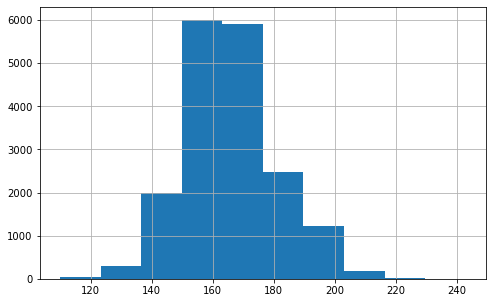

In [11]:
fig = plt.figure(figsize = (8,5))
ax = fig.gca()
data["Weight"].hist(ax = ax)
fig.savefig(output_dir + "weight_hist.png")

## BMI: Body Mass Index

In [12]:
data['BMI'] = (data['Weight'] * 0.45359237) /  ((data['Height']/100)**2)

## Currency

#### Check NaN values

In [13]:
idx = data['Release Clause'].isnull()
idx = data[idx].index
data = data.drop(index=idx)
print(len(idx), 'dropped !')

1516 dropped !


In [14]:
def transform_currency(x):
    if x == -1:
        print('error', x)        
        return -1
            
    # remove symbol
    if str(x[0]) != '€':
        print('error', x)        
    x = x[1:]

    if x[-1] == 'K':
        x = float(x[:-1]) * 1000
    elif x[-1] == 'M':
        x = float(x[:-1]) * 1000000
        
    return x

In [15]:
# transform
data['Value'] = data['Value'].map(transform_currency).astype(float)
data['Wage'] = data['Wage'].map(transform_currency).astype(float)
data['Release Clause'] = data['Release Clause'].map(transform_currency).astype(float)

## Position groups

In [16]:
print(len(data['Position'].value_counts()))
data['Position'].value_counts()

27


ST     1924
GK     1900
CB     1646
CM     1276
LB     1223
RB     1199
RM     1022
LM     1012
CAM     877
CDM     873
RCB     615
LCB     595
RCM     355
LCM     353
LW      338
RW      325
RDM     228
LDM     224
LS      184
RS      179
RWB      84
LWB      76
CF       66
RAM      21
LAM      20
LF       15
RF       13
Name: Position, dtype: int64

In [17]:
# https://pxilok.ru/threads/fifa-20-positions-ids.593/
def_pos = [
    'RWB', 'RB', 'RCB', 'CB', 'LCB', 'LB', 'LWB'
]
mid_pos = [
    'RDM', 'CDM', 'LDM', 'RM', 'RCM', 'CM', 'LCM', 'LM', 
    'RAM', 'CAM', 'LAM'
]
fwd_pos = [
    'RF', 'CF', 'LF', 'RW', 'RS', 'ST', 'LS', 'LW'
]

def transform_position(x):
    if x in def_pos:
        return 'DEF'
    elif x in mid_pos:
        return 'MID'
    elif x in fwd_pos:
        return 'FWD'
    elif x == 'GK':
        return 'GK'
    else:
        print("error:", x)
        return 'unknown'

In [18]:
data['NPosition'] = data['Position'].map(transform_position)
data['NPosition'].value_counts()

MID    6261
DEF    5438
FWD    3044
GK     1900
Name: NPosition, dtype: int64

## Stats

In [19]:
stat_col = [
    'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
    'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM',
    'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'
]

#### Check NaN

In [20]:
for col in stat_col:
    idx = data[col].isnull()
    idx = data[idx].index
    print(col, len(idx))
    data = data.drop(index=idx)
data

LS 1900
ST 0
RS 0
LW 0
LF 0
CF 0
RF 0
RW 0
LAM 0
CAM 0
RAM 0
LM 0
LCM 0
CM 0
RCM 0
RM 0
LWB 0
LDM 0
CDM 0
RDM 0
RWB 0
LB 0
LCB 0
CB 0
RCB 0
RB 0


,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,BMI,NPosition
0,L. Messi,30-35,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,170.2,159,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,24.896813,FWD
1,Cristiano Ronaldo,30-35,Portugal,94,94,Juventus,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,188.0,183,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,23.485571,FWD
2,Neymar Jr,25-30,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,175.3,150,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,22.140793,FWD
4,K. De Bruyne,25-30,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,180.3,154,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,21.487951,MID
5,E. Hazard,25-30,Belgium,91,91,Chelsea,93000000.0,340000.0,2142,Right,4.0,4.0,4.0,High/ Medium,Normal,LF,10.0,"Jul 1, 2012",NaN,2020,172.7,163,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3,82+3,82+3,89+3,66+3,63+3,63+3,63+3,66+3,60+3,49+3,49+3,49+3,60+3,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0,24.789552,FWD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,-20,England,47,65,Crewe Alexandra,60000.0,1000.0,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,CM,22.0,"May 3, 2017",NaN,2019,175.3,134,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,45+2,45+2,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0,19.779108,MID
18203,N. Christoffersson,-20,Sweden,47,63,Trelleborgs FF,60000.0,1000.0,1098,Right,1.0,2.0,2.0,Medium

In [21]:
# remove value stat+value in stat col
def clean_stat(x):
    if len(str(x)) > 0:
        #print(x, str(x).split('+')[0])
        return str(x).split('+')[0]

In [22]:
for col in stat_col:
    data[col] = data[col].map(clean_stat).astype(int)

In [23]:
data['NPosition'].value_counts()

MID    6261
DEF    5438
FWD    3044
Name: NPosition, dtype: int64

# Body Type

In [24]:
data['Body Type'].value_counts()

Normal                 8374
Lean                   5440
Stocky                  923
Messi                     1
C. Ronaldo                1
Neymar                    1
PLAYER_BODY_TYPE_25       1
Shaqiri                   1
Akinfenwa                 1
Name: Body Type, dtype: int64

In [25]:
data['Body Type'].loc[data['Body Type'].isin(['C. Ronaldo', 'Akinfenwa', 'Neymar','Shaqiri', 'PLAYER_BODY_TYPE_25', 'Courtois', 'Messi'])] = 'Unknown'
data['Body Type'].value_counts()

/opt/anaconda/envs/SD/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Normal     8374
Lean       5440
Stocky      923
Unknown       6
Name: Body Type, dtype: int64

### Correlations

<ipython-input-26-438a0b794bbd>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype = np.bool)


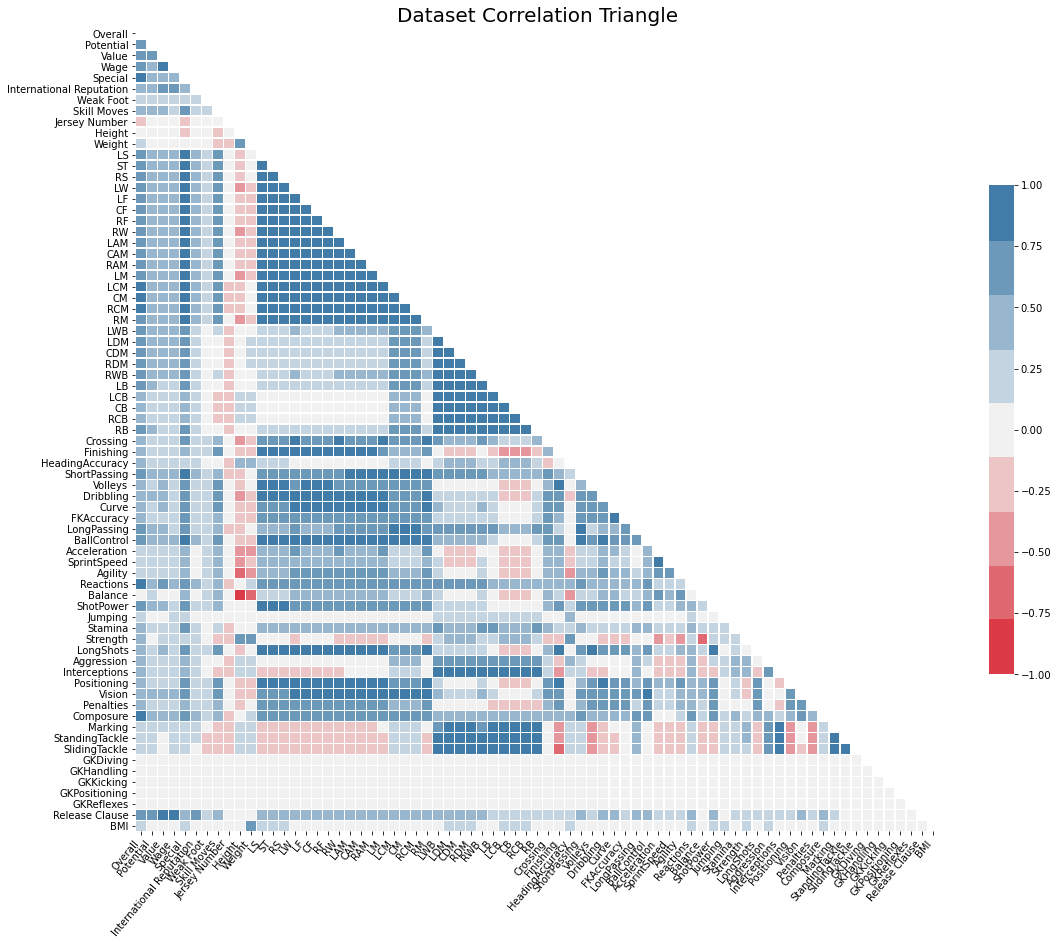

In [26]:
corr = data.corr(method = 'pearson')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize = (18, 18))
cmap = sns.diverging_palette(10, 240, n=9)
sns.heatmap(corr, mask = mask, cmap = cmap, vmin = -1, vmax = 1, center = 0,
                square = True, linewidths = .5, cbar_kws = {"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation = 50, horizontalalignment = 'right')
ax.set_title("Dataset Correlation Triangle", fontsize = 20)
fig.savefig(output_dir + "correlation.png")

<ipython-input-27-4c93883cc0c5>:22: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype = np.bool)


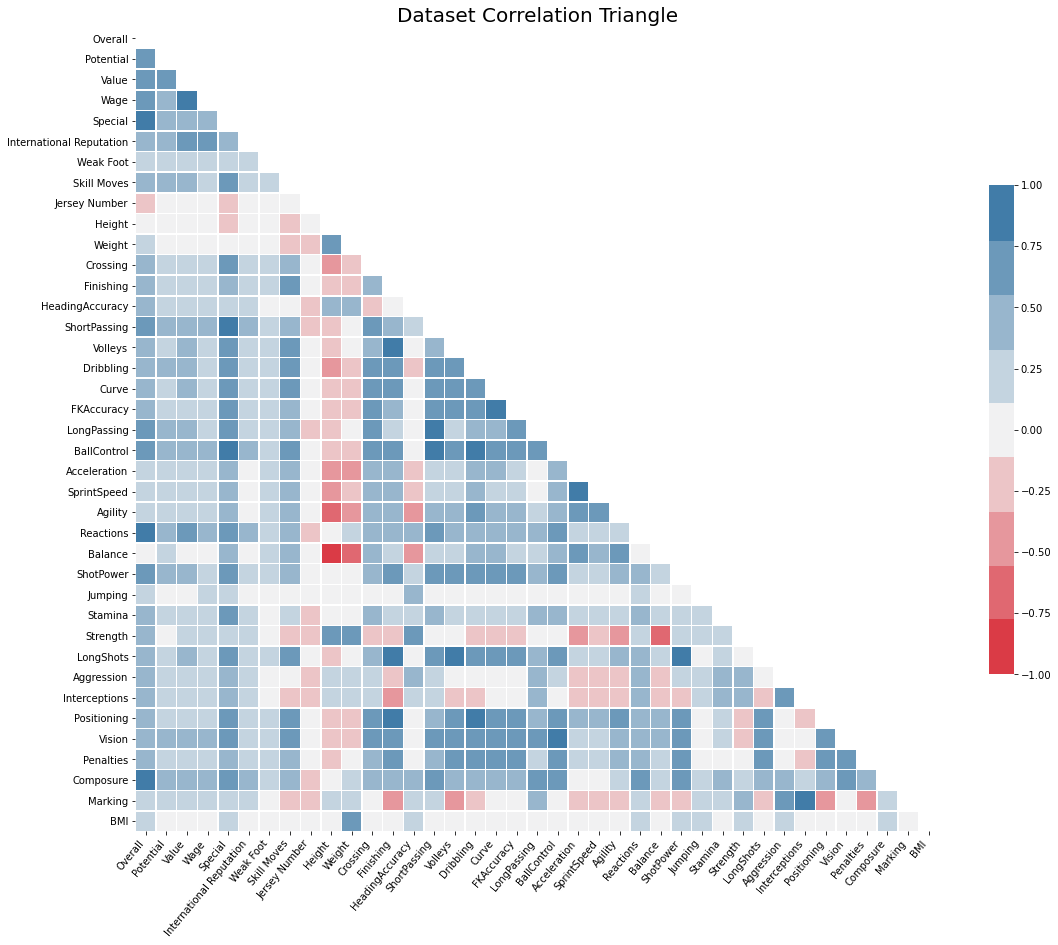

In [27]:
data_clean = data.copy()

# drop all stats

corr_drops = def_pos + mid_pos + fwd_pos
corr_drops += [
    'Release Clause',
    'StandingTackle',
    'SlidingTackle',
    'GKDiving',
    'GKHandling',
    'GKKicking',
    'GKPositioning',
    'GKReflexes',
]

data_clean = data_clean.drop(corr_drops, axis=1)

corr = data_clean.corr(method = 'pearson')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize = (18, 18))
cmap = sns.diverging_palette(10, 240, n=9)
sns.heatmap(corr, mask = mask, cmap = cmap, vmin = -1, vmax = 1, center = 0,
                square = True, linewidths = .5, cbar_kws = {"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation = 50, horizontalalignment = 'right')
ax.set_title("Dataset Correlation Triangle", fontsize = 20)
fig.savefig(output_dir + "correlation_cleaned.png")

# Discretization

### Wage

In [28]:
data_clean["Wage"].std()

22834.38082774488

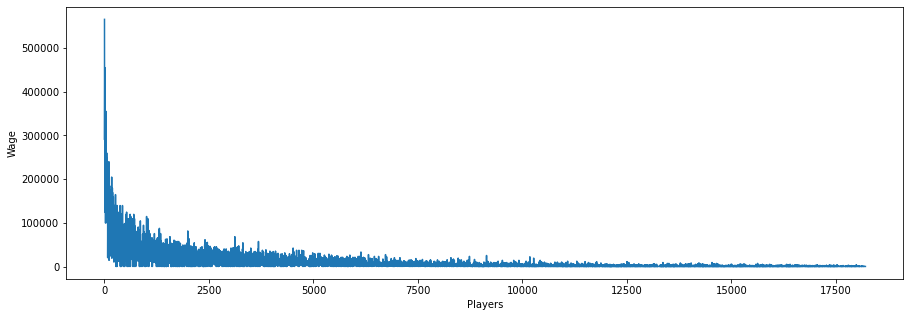

In [29]:
fig = plt.figure(figsize = (15,5))
ax = fig.gca()
data_clean["Wage"].plot()
ax.set_xlabel("Players")
ax.set_ylabel("Wage")
fig.savefig(output_dir + "Wage_plot.png")

(1000.0, 3000.0]        3997
(0.0, 1000.0]           3939
(3000.0, 10000.0]       3524
(10000.0, 1000000.0]    3283
Name: DWage, dtype: int64


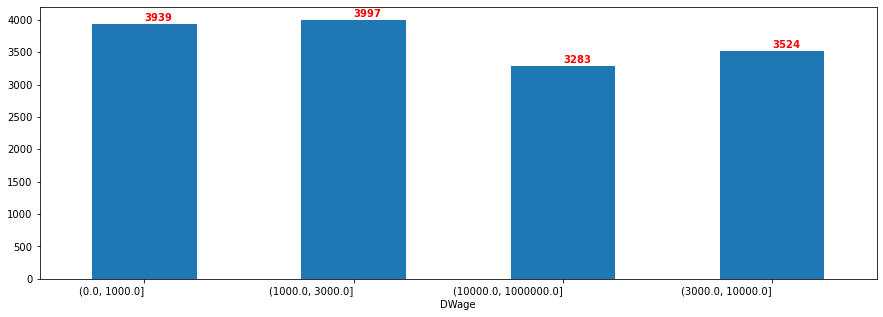

In [30]:
wage_itrvl = [0, 100e1,  300e1,  1000e1, 100000e1]
data_clean["DWage"] = pd.cut(data_clean['Wage'].values, wage_itrvl).astype(str)
print(data_clean["DWage"].value_counts())

tmp = data_clean.groupby('DWage').DWage.count()
fig = plt.figure(figsize = (15,5))
ax = fig.gca()
tmp.plot(kind="bar")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, horizontalalignment = 'right')


for index,v in enumerate(tmp.values):
    plt.text(x=index , y=v+50 , s=f"{v}", fontweight='bold', color='red')

fig.savefig(output_dir + "DWage_hist_bar.png")

### Value

In [31]:
data_clean["Value"].std()

5833752.058928244

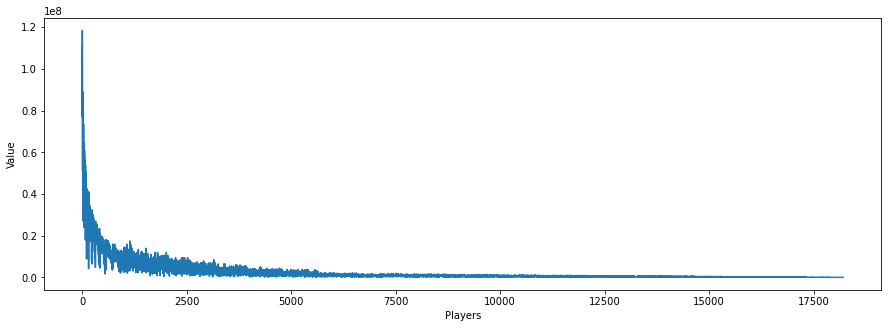

In [32]:
fig = plt.figure(figsize = (15,5))
ax = fig.gca()
data_clean["Value"].plot()
ax.set_xlabel("Players")
ax.set_ylabel("Value")
fig.savefig(output_dir + "Value_plot.png")

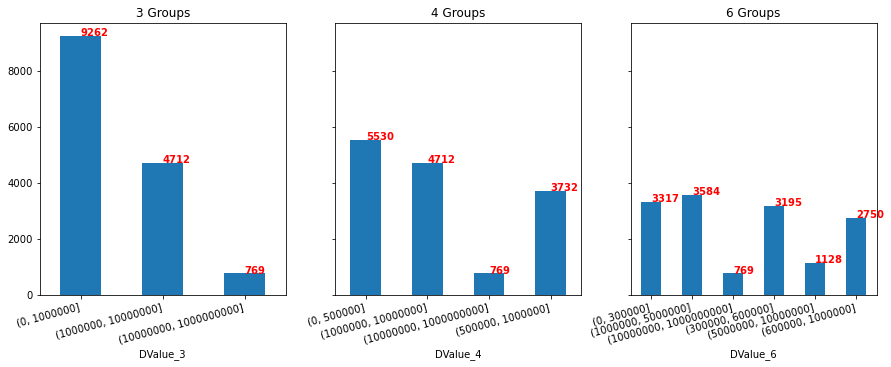

In [33]:
t = 100000

value_itrvl_3 = [0, t*10, t*100, t*10000]
value_itrvl_4 = [0, t*5, t*10, t*100, t*10000]
value_itrvl_6 = [0, t*3, t*6, t*10, t*50, t*100, t*10000]

data_clean["DValue_3"] = pd.cut(data_clean['Value'].values, value_itrvl_3).astype(str)
data_clean["DValue_4"] = pd.cut(data_clean['Value'].values, value_itrvl_4).astype(str)
data_clean["DValue_6"] = pd.cut(data_clean['Value'].values, value_itrvl_6).astype(str)

tmp3 = data_clean.groupby('DValue_3').DValue_3.count()
tmp4 = data_clean.groupby('DValue_4').DValue_4.count()
tmp6 = data_clean.groupby('DValue_6').DValue_6.count()

fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))

tmp3.plot(kind="bar", ax=ax[0])
ax[0].set_title('3 Groups')
for index,v in enumerate(tmp3.values):
    ax[0].text(x=index , y=v , s=f"{v}", fontweight='bold', color='red')

tmp4.plot(kind="bar", ax=ax[1])
ax[1].set_title('4 Groups')
for index,v in enumerate(tmp4.values):
    ax[1].text(x=index , y=v , s=f"{v}", fontweight='bold', color='red')

tmp6.plot(kind="bar", ax=ax[2])
ax[2].set_title('6 Groups')
for index,v in enumerate(tmp6.values):
    ax[2].text(x=index , y=v , s=f"{v}", fontweight='bold', color='red')
    
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 15, horizontalalignment = 'right')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 15, horizontalalignment = 'right')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 15, horizontalalignment = 'right')


fig.savefig(output_dir + "Dvalue_all_groups_plot.png")

# Prediction

In [34]:
def cross_val_mean_std(model, x, y, scoring='r2'):
    scores = cross_val_score(model, x, y, cv=5, scoring=scoring)
    return np.mean(scores), np.std(scores)

In [35]:
def print_scores(y_true, y_pred, classif=False):
    
    print("Scores: ")
    if classif:
        print("accuracy score:", metrics.accuracy_score(y_true,y_pred))
        print("--------------------------------------")
        print('f1 macro score:', metrics.f1_score(y_true,y_pred, average='macro'))
        print('f1 micro score:', metrics.f1_score(y_true,y_pred, average='micro'))
        print('f1 weighted score:', metrics.f1_score(y_true,y_pred, average='weighted'))
        print("----------------------")
        print('recall macro score:', metrics.recall_score(y_true,y_pred, average='macro'))
        print('recall micro score:', metrics.recall_score(y_true,y_pred, average='micro'))
        print('recall weighted score:', metrics.recall_score(y_true,y_pred, average='weighted'))
        print("----------------------")
        print('precision macro score:', metrics.precision_score(y_true,y_pred, average='macro'))
        print('precision micro score:', metrics.precision_score(y_true,y_pred, average='micro'))
        print('precision weighted score:', metrics.precision_score(y_true,y_pred, average='weighted'))
        print("----------------------")
    else:
        print('MAE score:', metrics.mean_absolute_error(y_true, y_pred))
        print('MSE score:', metrics.mean_squared_error(y_true, y_pred))
        print('R2 score :', metrics.r2_score(y_true, y_pred))
        print("--------------------------------------")

In [36]:
def display_coef(clf, clf_name, features_names, output_name):
    coefs = pd.DataFrame(
       clf.coef_,
       columns=['Coefficients'], index=features_names
    )

    ax = coefs.plot(kind='barh', figsize=(15, 15))
    fig = ax.get_figure()

    plt.title(clf_name + ' model')
    plt.axvline(x=0, color='.5')
    plt.subplots_adjust(left=.3)
    plt.show()
    fig.savefig(output_dir + output_name)

### Last Clean

In [37]:
data_pred = data_clean.copy()
pred_drops = [
    'Name',
    'Nationality',
    'Club',
    'Position',
    'Joined',
    'Contract Valid Until',
    'Loaned From'
]

data_pred = data_pred.drop(pred_drops, axis=1)
data_pred

,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Jersey Number,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,BMI,NPosition,DWage,DValue_3,DValue_4,DValue_6
0,30-35,94,94,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Unknown,10.0,170.2,159,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,24.896813,FWD,"(10000.0, 1000000.0]","(10000000, 1000000000]","(10000000, 1000000000]","(10000000, 1000000000]"
1,30-35,94,94,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,Unknown,7.0,188.0,183,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,23.485571,FWD,"(10000.0, 1000000.0]","(10000000, 1000000000]","(10000000, 1000000000]","(10000000, 1000000000]"
2,25-30,92,93,118500000.0,290000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Unknown,10.0,175.3,150,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,22.140793,FWD,"(10000.0, 1000000.0]","(10000000, 1000000000]","(10000000, 1000000000]","(10000000, 1000000000]"
4,25-30,91,92,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,7.0,180.3,154,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,21.487951,MID,"(10000.0, 1000000.0]","(10000000, 1000000000]","(10000000, 1000000000]","(10000000, 1000000000]"
5,25-30,91,91,93000000.0,340000.0,2142,Right,4.0,4.0,4.0,High/ Medium,Normal,10.0,172.7,163,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,24.789552,FWD,"(10000.0, 1000000.0]","(10000000, 1000000000]","(10000000, 1000000000]","(10000000, 1000000000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,-20,47,65,60000.0,1000.0,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,22.0,175.3,134,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,19.779108,MID,"(0.0, 1000.0]","(0, 1000000]","(0, 500000]","(0, 300000]"
18203,-20,47,63,60000.0,1000.0,1098,Right,1.0,2.0,2.0,Medium/ Medium,Normal,21.0,190.5,170,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,21.248325,FWD,"(0.0, 1000.0]","(0, 1000000]","(0, 500000]","(0, 300000]"
18204,-20,47,67,60000.0,1000.0,1189,Right,1.0,3.0,2.0,Medium/ Medium,Normal,33.0,172.7,148,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,22.508304,FWD,"(0.0, 1000.0]","(0, 1000000]","(0, 500000]","(0, 300000]"
18205,-20,47,66,60000.0,1000.0,1228,Right,1.0,3.0,2.0,Medium/ Medium,Lean,34.0,177.8,154,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,22.096473,FWD,"(0.0, 1000.0]","(0, 1000000]","(0, 500000]","(0, 300000]"


### Dummies

In [38]:
dummy_cols = [
    'Age',
    'Work Rate',
    'Preferred Foot',
    'Body Type',
    'NPosition',
    'DWage',
    'DValue_3',
    'DValue_4',
    'DValue_6'
]

for col in dummy_cols:
    data_pred[col] = data_pred[col].astype('category').cat.codes

In [39]:
data_pred

,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Jersey Number,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,BMI,NPosition,DWage,DValue_3,DValue_4,DValue_6
0,4,94,94,110500000.0,565000.0,2202,0,5.0,4.0,4.0,8,3,10.0,170.2,159,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,24.896813,1,2,2,2,2
1,4,94,94,77000000.0,405000.0,2228,1,5.0,4.0,5.0,1,3,7.0,188.0,183,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,23.485571,1,2,2,2,2
2,3,92,93,118500000.0,290000.0,2143,1,5.0,5.0,5.0,2,3,10.0,175.3,150,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,22.140793,1,2,2,2,2
4,3,91,92,102000000.0,355000.0,2281,1,4.0,5.0,4.0,0,1,7.0,180.3,154,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,21.487951,2,2,2,2,2
5,3,91,91,93000000.0,340000.0,2142,1,4.0,4.0,4.0,2,1,10.0,172.7,163,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,24.789552,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,1,47,65,60000.0,1000.0,1307,1,1.0,2.0,2.0,8,0,22.0,175.3,134,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,19.779108,2,0,0,0,0
18203,1,47,63,60000.0,1000.0,1098,1,1.0,2.0,2.0,8,1,21.0,190.5,170,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,21.248325,1,0,0,0,0
18204,1,47,67,60000.0,1000.0,1189,1,1.0,3.0,2.0,8,1,33.0,172.7,148,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,22.508304,1,0,0,0,0
18205,1,47,66,60000.0,1000.0,1228,1,1.0,3.0,2.0,8,0,34.0,177.8,154,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,22.096473,1,0,0,0,0


# Regresion

In [40]:
reg_models = {
    'LinearRegression': LinearRegression(),
    'LASSO': Lasso(random_state=random_state, max_iter=100000),
    'Ridge': Ridge(random_state=random_state, max_iter=100000)
}

## Value

In [41]:
X_value = data_pred.drop(['Value', 'DValue_3', 'DValue_4', 'DValue_6', 'DWage'], axis=1)
features_name_value = X_value.columns
y_value = data_pred['Value'].astype(int)

scaler = StandardScaler()
X_value = scaler.fit_transform(X_value)

X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_value,y_value,test_size=.3, random_state=random_state)

LinearRegression
Scores: 
MAE score: 1382738.2379556147
MSE score: 7958514805421.52
R2 score : 0.8198232853921155
--------------------------------------
Cross Val
mean_score: -255.783940419324 std_score: 684.5258804099309


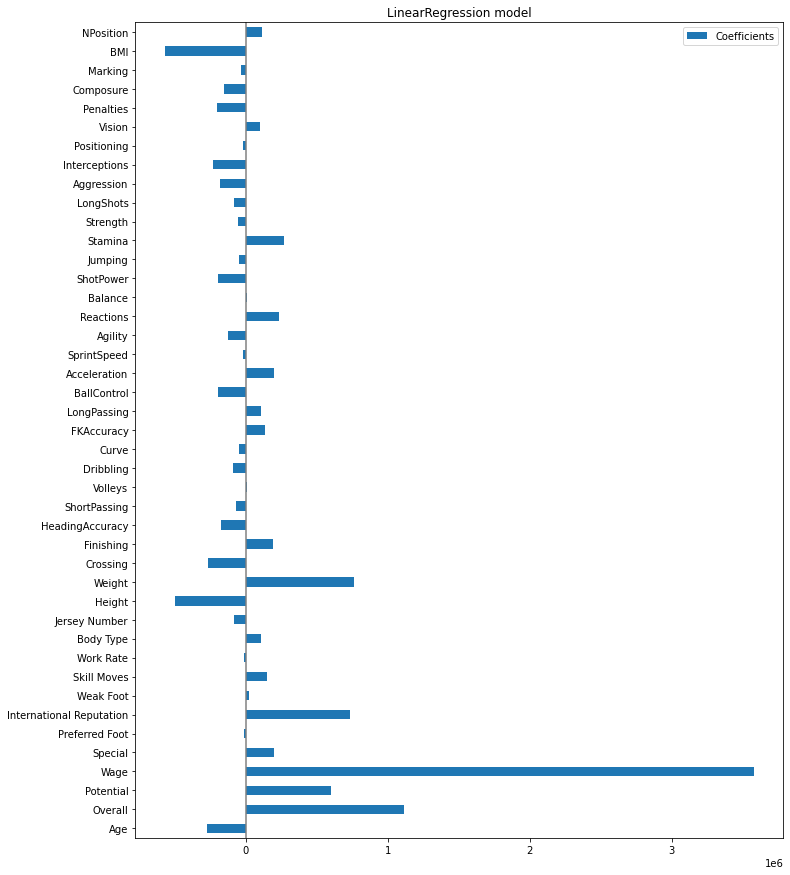

LASSO
Scores: 
MAE score: 1382732.9967193224
MSE score: 7958509017546.024
R2 score : 0.8198234164266636
--------------------------------------
Cross Val
mean_score: -255.78352004539244 std_score: 684.5256381578585


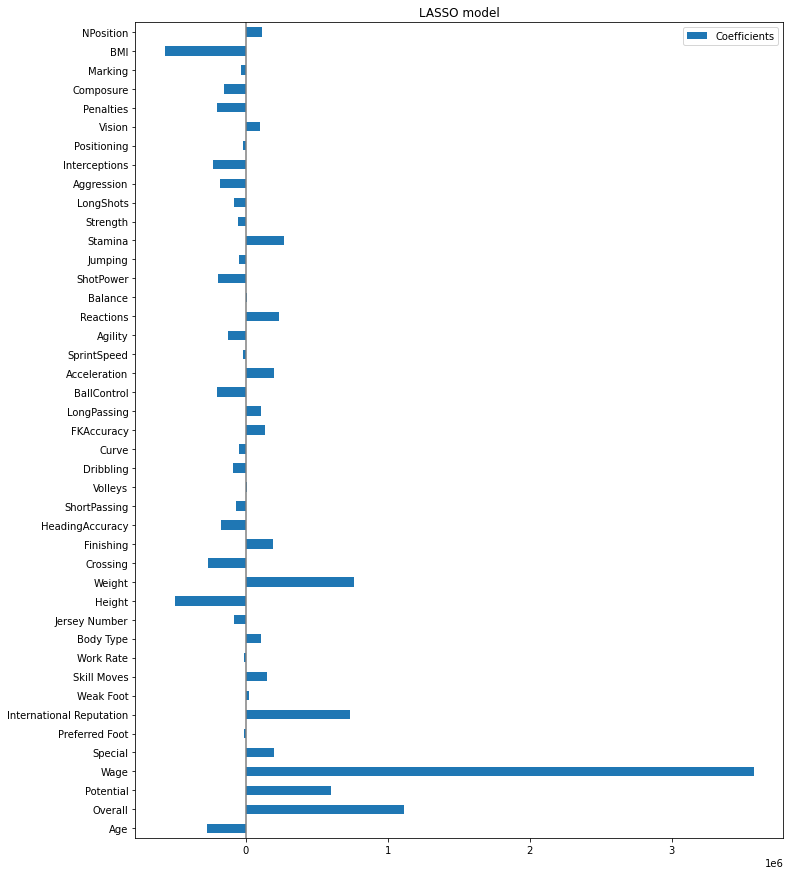

Ridge
Scores: 
MAE score: 1382593.1536121499
MSE score: 7958763211828.861
R2 score : 0.819817661597795
--------------------------------------
Cross Val
mean_score: -255.72242531811116 std_score: 684.3610615349985


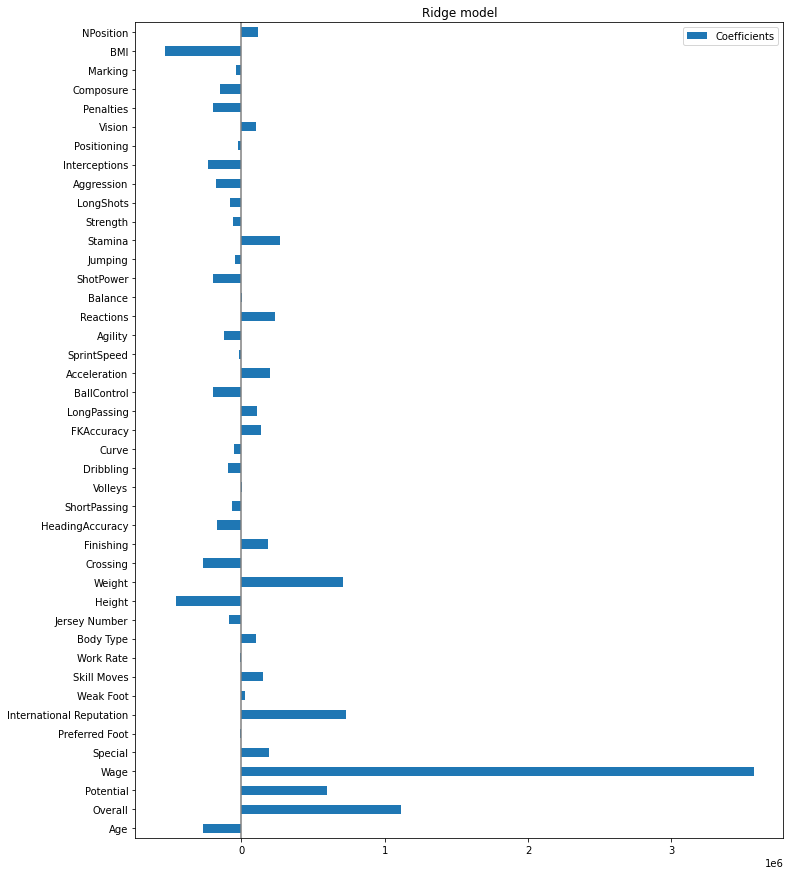

In [42]:
indexes = ['LinearRegression', 'LASSO', 'Ridge']
columns = ['R2', 'R2_mean_CV10', 'R2_std_CV10']
s_value = []
for m in reg_models:
    print(m)
    clf = reg_models[m]
    clf.fit(X_train_v, y_train_v)
    pred = clf.predict(X_test_v)
    print_scores(y_test_v, pred)
    print("Cross Val")
    scores = cross_val_score(clf, X_value, y_value, cv=10, scoring='r2')
    print('mean_score:', scores.mean(), 'std_score:', scores.std())
    s_value += [[metrics.r2_score(y_test_v, pred), scores.mean(), scores.std()]]
    
    print("============================================")
    display_coef(clf, m, features_name_value, 'feature_importance_value_' + m + '.png')

In [74]:
reg_scores = pd.DataFrame(s_value, index=indexes, columns=columns)
reg_scores

,R2,R2_mean_CV10,R2_std_CV10
LinearRegression,0.819823,-255.783940,684.525880
LASSO,0.819823,-255.783520,684.525638
Ridge,0.819818,-255.722425,684.361062


In [75]:
print(reg_scores.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &        R2 &  R2\_mean\_CV10 &  R2\_std\_CV10 \\
\midrule
LinearRegression &  0.819823 &   -255.783940 &   684.525880 \\
LASSO            &  0.819823 &   -255.783520 &   684.525638 \\
Ridge            &  0.819818 &   -255.722425 &   684.361062 \\
\bottomrule
\end{tabular}



## Wage

In [44]:
X_wage = data_pred.drop(['Wage', 'DWage', 'DValue_3', 'DValue_4', 'DValue_6'], axis=1)
features_name_wage = X_wage.columns
y_wage = data_pred['Wage'].astype(int)

scaler = StandardScaler()
X_wage = scaler.fit_transform(X_wage)

X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_wage,y_wage,test_size=.3, random_state=random_state)

LinearRegression
Scores: 
MAE score: 5058.210829341932
MSE score: 136868018.08162567
R2 score : 0.7941893628491057
--------------------------------------
Cross Val
mean_score: -1.285790201685891 std_score: 2.0326058247349392


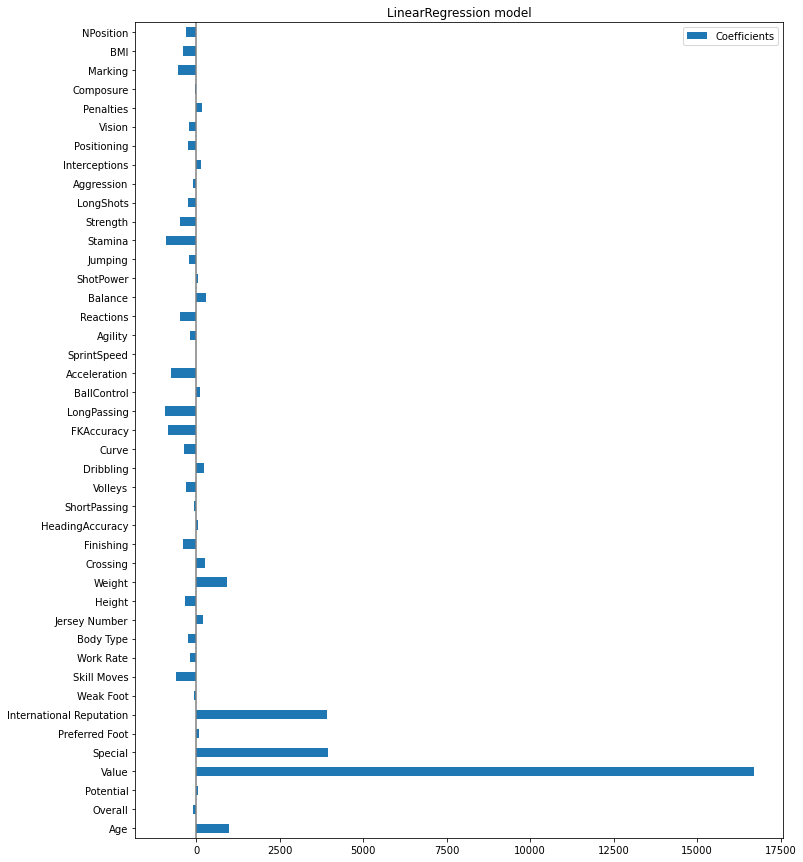

LASSO
Scores: 
MAE score: 5055.2614631412935
MSE score: 136862316.33031958
R2 score : 0.7941979366641256
--------------------------------------
Cross Val
mean_score: -1.2602719524848809 std_score: 1.9870274312690213


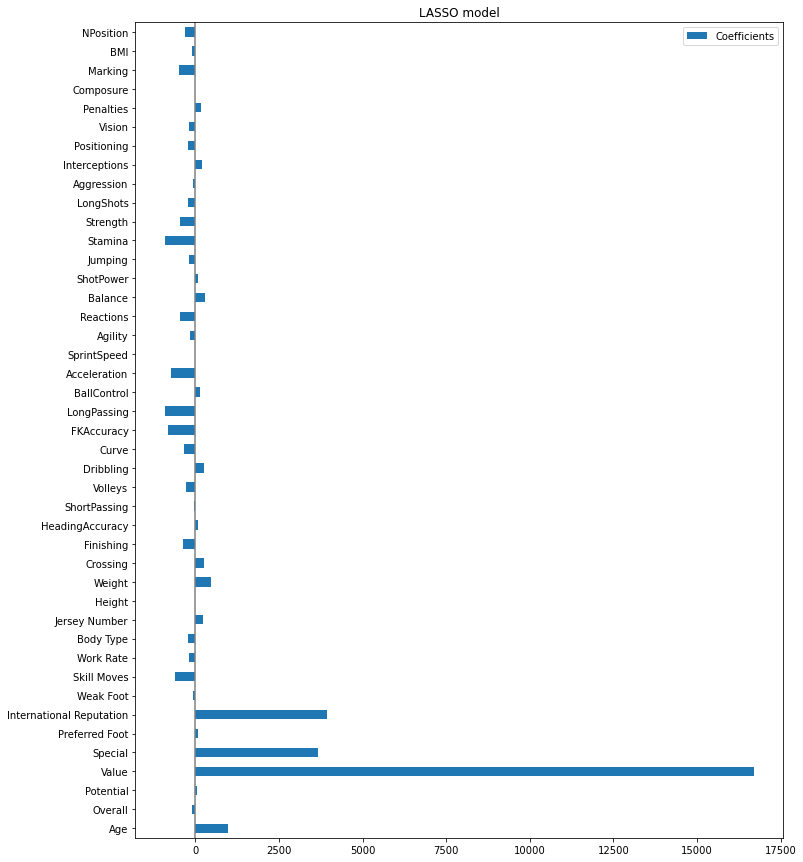

Ridge
Scores: 
MAE score: 5057.869575588758
MSE score: 136872915.41234064
R2 score : 0.7941819986542491
--------------------------------------
Cross Val
mean_score: -1.283867575835393 std_score: 2.0306387154799546


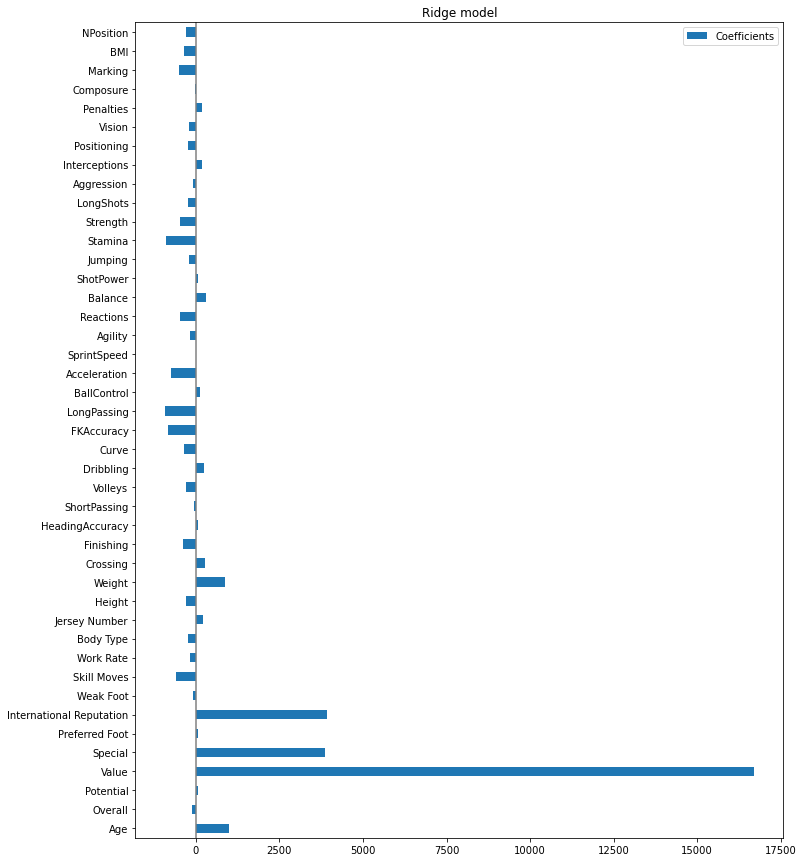

In [45]:
s_wage = []

for m in reg_models:
    print(m)
    clf = reg_models[m]
    clf.fit(X_train_w, y_train_w)
    pred = clf.predict(X_test_w)
    print_scores(y_test_w, pred)
    print("Cross Val")
    scores = cross_val_score(clf, X_wage, y_wage, cv=10, scoring='r2')
    print('mean_score:', scores.mean(), 'std_score:', scores.std())
    s_wage += [[metrics.r2_score(y_test_w, pred), scores.mean(), scores.std()]]
    print("============================================")
    display_coef(clf, m, features_name_wage, 'feature_importance_wage_' + m + '.png')

In [72]:
reg_scores = pd.DataFrame(s_wage, index=indexes, columns=columns)
reg_scores

,R2,R2_mean_CV10,R2_std_CV10
LinearRegression,0.794189,-1.285790,2.032606
LASSO,0.794198,-1.260272,1.987027
Ridge,0.794182,-1.283868,2.030639


In [73]:
print(reg_scores.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &        R2 &  R2\_mean\_CV10 &  R2\_std\_CV10 \\
\midrule
LinearRegression &  0.794189 &     -1.285790 &     2.032606 \\
LASSO            &  0.794198 &     -1.260272 &     1.987027 \\
Ridge            &  0.794182 &     -1.283868 &     2.030639 \\
\bottomrule
\end{tabular}



## Overall

In [47]:
X_overall = data_pred.drop(['Overall', 'DWage', 'DValue_3', 'DValue_4', 'DValue_6'], axis=1)
features_name_overall = X_overall.columns
y_overall = data_pred['Overall'].astype(int)

scaler = StandardScaler()
X_overall = scaler.fit_transform(X_overall)

X_train_oa, X_test_oa, y_train_oa, y_test_oa = train_test_split(X_overall,y_overall,test_size=.3, random_state=random_state)

LinearRegression
Scores: 
MAE score: 1.5076029743524502
MSE score: 3.7629252206107724
R2 score : 0.9228698963737094
--------------------------------------
Cross Val
mean_score: -5.797898923258673 std_score: 2.9345585851012537


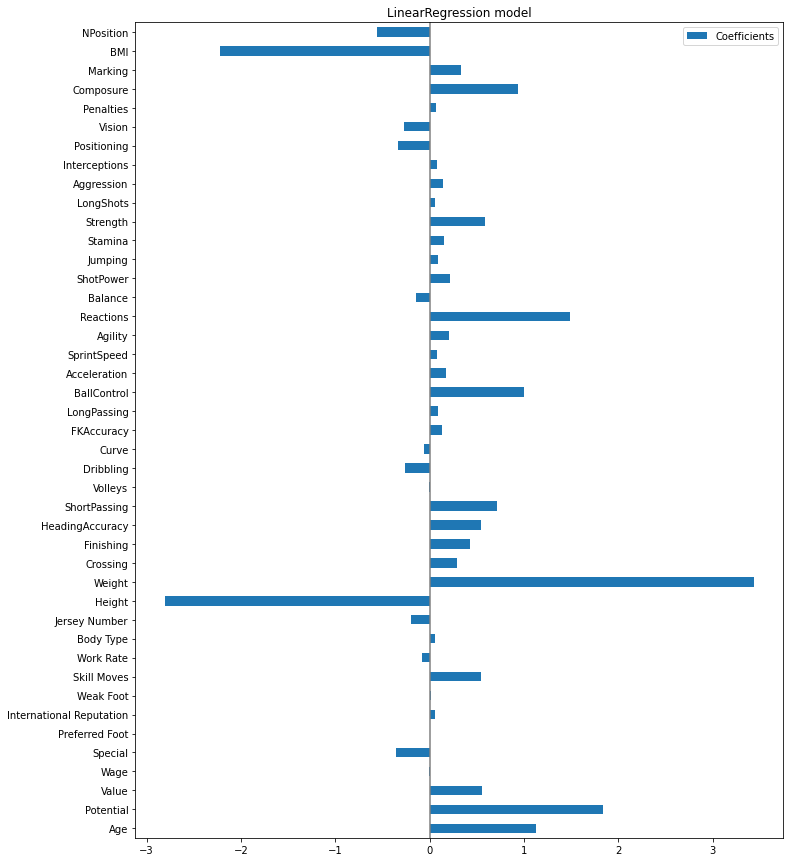

LASSO
Scores: 
MAE score: 2.164160225011681
MSE score: 7.652762086854106
R2 score : 0.8431384366733183
--------------------------------------
Cross Val
mean_score: -8.311401730805056 std_score: 2.550679915451432


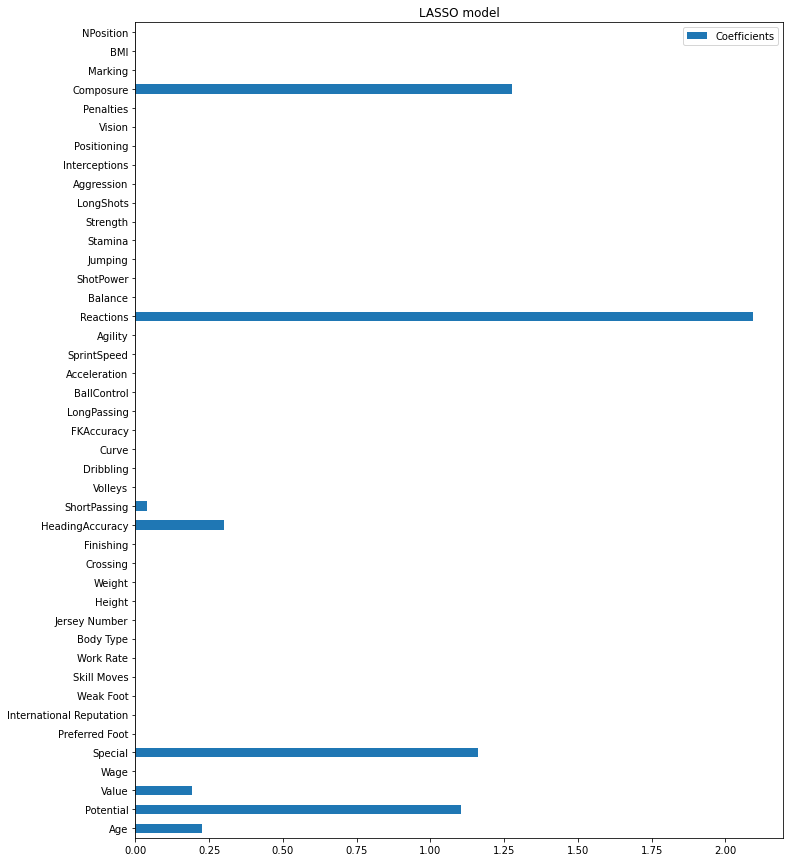

Ridge
Scores: 
MAE score: 1.5078486093512693
MSE score: 3.7643911221944406
R2 score : 0.922839849233672
--------------------------------------
Cross Val
mean_score: -5.796283829368693 std_score: 2.9340556917660114


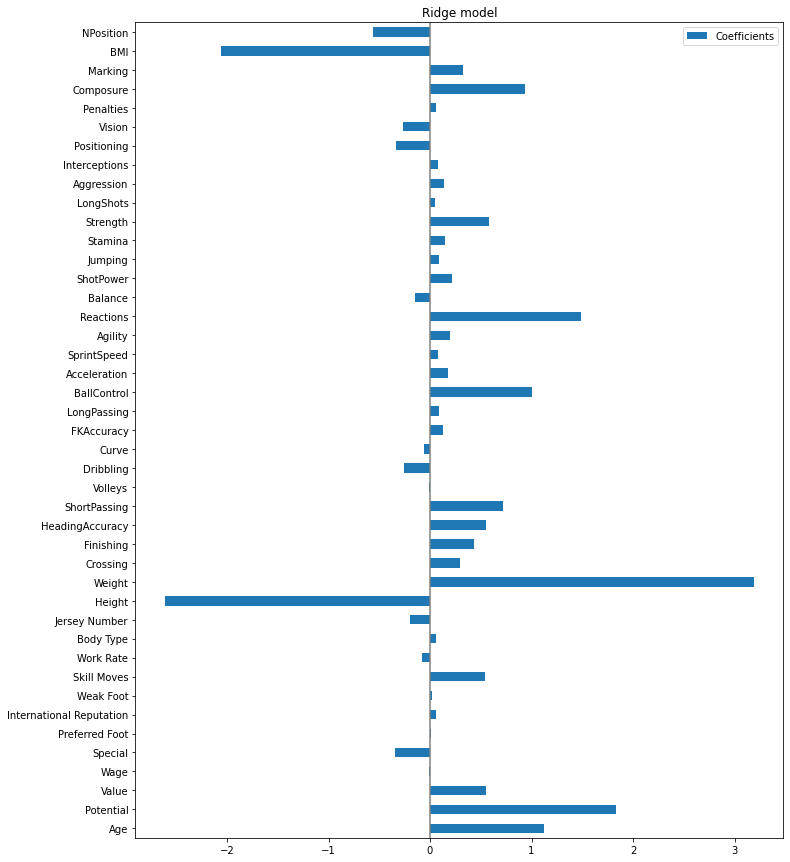

In [48]:
s_overall = []
for m in reg_models:
    print(m)
    clf = reg_models[m]
    clf.fit(X_train_oa, y_train_oa)
    pred = clf.predict(X_test_oa)
    print_scores(y_test_oa, pred)
    print("Cross Val")
    scores = cross_val_score(clf, X_overall, y_overall, cv=10, scoring='r2')
    print('mean_score:', scores.mean(), 'std_score:', scores.std())
    s_overall += [[metrics.r2_score(y_test_oa, pred), scores.mean(), scores.std()]]
    print("============================================")
    display_coef(clf, m, features_name_overall, 'feature_importance_overall_' + m + '.png')

In [76]:
reg_scores = pd.DataFrame(s_overall, index=indexes, columns=columns)
reg_scores

,R2,R2_mean_CV10,R2_std_CV10
LinearRegression,0.922870,-5.797899,2.934559
LASSO,0.843138,-8.311402,2.550680
Ridge,0.922840,-5.796284,2.934056


In [77]:
print(reg_scores.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &        R2 &  R2\_mean\_CV10 &  R2\_std\_CV10 \\
\midrule
LinearRegression &  0.922870 &     -5.797899 &     2.934559 \\
LASSO            &  0.843138 &     -8.311402 &     2.550680 \\
Ridge            &  0.922840 &     -5.796284 &     2.934056 \\
\bottomrule
\end{tabular}



# Classification

### DValue

In [50]:
classif_models = {
    'LogisticRegression': LogisticRegression(random_state=random_state, max_iter=1000),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=0, max_depth=100),
    'RandomForestClassifier': RandomForestClassifier(random_state=0, max_depth=100),
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier_3': KNeighborsClassifier(3),
    'KNeighborsClassifier_4': KNeighborsClassifier(4),
    'KNeighborsClassifier_6': KNeighborsClassifier(6)
}

classif_indexes = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier']
classif_indexes += ['GaussianNB', 'KNeighborsClassifier_3', 'KNeighborsClassifier_4', 'KNeighborsClassifier_6']
#classif_columns = ['accuracy', 'f1_macro', 'f1_micro', 'f1_weighted']
classif_columns = ['accuracy', 'f1_weighted']

#classif_columns += ['recall_macro', 'recall_micro', 'recall_weighted']
classif_columns += ['recall_weighted']

#classif_columns += ['precision_macro', 'precision_micro', 'precision_weighted']
classif_columns += ['precision_weighted']

classif_columns += ['f1_weighted_mean_CV10', 'f1_weighted_std_CV10']

In [51]:
tmp_pred = data_pred.copy()
tmp_pred = tmp_pred.drop(['Value', 'DValue_3', 'DValue_4', 'DValue_6', 'DWage'], axis=1)

In [52]:
for i in [3,4,6]:
    
    X_dvalue = tmp_pred
    y_dvalue = data_pred['DValue_' + str(i)]

    scaler = StandardScaler()
    X_dvalue = scaler.fit_transform(X_dvalue)
    X_train_dv, X_test_dv, y_train_dv, y_test_dv = train_test_split(X_dvalue,y_dvalue,test_size=.3, random_state=random_state)
    
    s_dvalue = []
    for m in classif_models:
        print('pred', 'DValue_' + str(i), m)
        clf = classif_models[m]
        clf.fit(X_train_dv, y_train_dv)
        pred = clf.predict(X_test_dv)
        print_scores(y_test_dv, pred, classif=True)
        print(' cross_val')
        scores = cross_val_score(clf, X_dvalue, y_dvalue, cv=10, scoring='f1_weighted')
        print('  mean_score:', scores.mean(), 'std_score:', scores.std())
        print("============================================")
        print()
        
        s_dvalue += [[
            metrics.accuracy_score(y_test_dv,pred),
            
            #metrics.f1_score(y_test_dv,pred, average='macro'),
            #metrics.f1_score(y_test_dv,pred, average='micro'),
            metrics.f1_score(y_test_dv,pred, average='weighted'),
            
            #metrics.recall_score(y_test_dv,pred, average='macro'),
            #metrics.recall_score(y_test_dv,pred, average='micro'),
            metrics.recall_score(y_test_dv,pred, average='weighted'),
            
            #metrics.precision_score(y_test_dv,pred, average='macro'),
            #metrics.precision_score(y_test_dv,pred, average='micro'),
            metrics.precision_score(y_test_dv,pred, average='weighted'),
            
            scores.mean(),
            scores.std()
        ]]

    
    if i == 3:        
        df_scores_dvalue_3 = pd.DataFrame(s_dvalue, index=classif_indexes, columns=classif_columns)
    if i == 4:
        df_scores_dvalue_4 = pd.DataFrame(s_dvalue, index=classif_indexes, columns=classif_columns)
    if i == 6:
        df_scores_dvalue_6 = pd.DataFrame(s_dvalue, index=classif_indexes, columns=classif_columns)

pred DValue_3 LogisticRegression
Scores: 
accuracy score: 0.9631471851684377
--------------------------------------
f1 macro score: 0.940662424350725
f1 micro score: 0.9631471851684377
f1 weighted score: 0.9630516394733869
----------------------
recall macro score: 0.9333836712708244
recall micro score: 0.9631471851684377
recall weighted score: 0.9631471851684377
----------------------
precision macro score: 0.9484529232235653
precision micro score: 0.9631471851684377
precision weighted score: 0.9630469924455491
----------------------
 cross_val
  mean_score: 0.916721047869532 std_score: 0.11862930747306633

pred DValue_3 DecisionTreeClassifier
Scores: 
accuracy score: 0.9687994573818675
--------------------------------------
f1 macro score: 0.9571950247197236
f1 micro score: 0.9687994573818675
f1 weighted score: 0.9687865559767612
----------------------
recall macro score: 0.9599921891903856
recall micro score: 0.9687994573818675
recall weighted score: 0.9687994573818675
-------------

  mean_score: 0.7050304166184415 std_score: 0.09363321914405413

pred DValue_4 KNeighborsClassifier_6
Scores: 
accuracy score: 0.7664481121410807
--------------------------------------
f1 macro score: 0.7326642623593576
f1 micro score: 0.7664481121410807
f1 weighted score: 0.7594495094034447
----------------------
recall macro score: 0.7044119171212226
recall micro score: 0.7664481121410807
recall weighted score: 0.7664481121410807
----------------------
precision macro score: 0.79301790086421
precision micro score: 0.7664481121410807
precision weighted score: 0.7638069609698029
----------------------
 cross_val
  mean_score: 0.7174995063935103 std_score: 0.10543846123295554

pred DValue_6 LogisticRegression
Scores: 
accuracy score: 0.8403798326927425
--------------------------------------
f1 macro score: 0.8329847998279686
f1 micro score: 0.8403798326927425
f1 weighted score: 0.8400793850443747
----------------------
recall macro score: 0.8254125565133444
recall micro score: 0.8403798

In [53]:
df_scores_dvalue_3

,accuracy,f1_weighted,recall_weighted,precision_weighted,f1_weighted_mean_CV10,f1_weighted_std_CV10
LogisticRegression,0.963147,0.963052,0.963147,0.963047,0.916721,0.118629
DecisionTreeClassifier,0.968799,0.968787,0.968799,0.968801,0.883725,0.151050
RandomForestClassifier,0.962921,0.962901,0.962921,0.962938,0.860834,0.186419
GaussianNB,0.840606,0.843481,0.840606,0.850207,0.810712,0.176005
KNeighborsClassifier_3,0.867737,0.866033,0.867737,0.867085,0.825663,0.089968
KNeighborsClassifier_4,0.862311,0.856590,0.862311,0.861703,0.816515,0.102246
KNeighborsClassifier_6,0.870224,0.864807,0.870224,0.869804,0.824056,0.107767


In [78]:
print(df_scores_dvalue_3.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  accuracy &  f1\_weighted &  recall\_weighted &  precision\_weighted &  f1\_weighted\_mean\_CV10 &  f1\_weighted\_std\_CV10 \\
\midrule
LogisticRegression     &  0.963147 &     0.963052 &         0.963147 &            0.963047 &               0.916721 &              0.118629 \\
DecisionTreeClassifier &  0.968799 &     0.968787 &         0.968799 &            0.968801 &               0.883725 &              0.151050 \\
RandomForestClassifier &  0.962921 &     0.962901 &         0.962921 &            0.962938 &               0.860834 &              0.186419 \\
GaussianNB             &  0.840606 &     0.843481 &         0.840606 &            0.850207 &               0.810712 &              0.176005 \\
KNeighborsClassifier\_3 &  0.867737 &     0.866033 &         0.867737 &            0.867085 &               0.825663 &              0.089968 \\
KNeighborsClassifier\_4 &  0.862311 &     0.856590 &         0.862311 &            0.861703 &               0

In [54]:
df_scores_dvalue_4

,accuracy,f1_weighted,recall_weighted,precision_weighted,f1_weighted_mean_CV10,f1_weighted_std_CV10
LogisticRegression,0.905946,0.905821,0.905946,0.905859,0.843669,0.180698
DecisionTreeClassifier,0.931494,0.931511,0.931494,0.931529,0.816784,0.182516
RandomForestClassifier,0.926973,0.926982,0.926973,0.927013,0.773125,0.233648
GaussianNB,0.732308,0.737031,0.732308,0.751656,0.692522,0.189903
KNeighborsClassifier_3,0.730726,0.728015,0.730726,0.729527,0.692400,0.085815
KNeighborsClassifier_4,0.760118,0.750274,0.760118,0.755794,0.705030,0.093633
KNeighborsClassifier_6,0.766448,0.759450,0.766448,0.763807,0.717500,0.105438


In [79]:
print(df_scores_dvalue_4.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  accuracy &  f1\_weighted &  recall\_weighted &  precision\_weighted &  f1\_weighted\_mean\_CV10 &  f1\_weighted\_std\_CV10 \\
\midrule
LogisticRegression     &  0.905946 &     0.905821 &         0.905946 &            0.905859 &               0.843669 &              0.180698 \\
DecisionTreeClassifier &  0.931494 &     0.931511 &         0.931494 &            0.931529 &               0.816784 &              0.182516 \\
RandomForestClassifier &  0.926973 &     0.926982 &         0.926973 &            0.927013 &               0.773125 &              0.233648 \\
GaussianNB             &  0.732308 &     0.737031 &         0.732308 &            0.751656 &               0.692522 &              0.189903 \\
KNeighborsClassifier\_3 &  0.730726 &     0.728015 &         0.730726 &            0.729527 &               0.692400 &              0.085815 \\
KNeighborsClassifier\_4 &  0.760118 &     0.750274 &         0.760118 &            0.755794 &               0

In [55]:
df_scores_dvalue_6

,accuracy,f1_weighted,recall_weighted,precision_weighted,f1_weighted_mean_CV10,f1_weighted_std_CV10
LogisticRegression,0.840380,0.840079,0.840380,0.840511,0.777335,0.207813
DecisionTreeClassifier,0.892607,0.892292,0.892607,0.892176,0.744778,0.255623
RandomForestClassifier,0.886050,0.886260,0.886050,0.887518,0.713415,0.270342
GaussianNB,0.627854,0.628603,0.627854,0.635709,0.583461,0.186409
KNeighborsClassifier_3,0.600271,0.592759,0.600271,0.596563,0.555849,0.083376
KNeighborsClassifier_4,0.633281,0.621264,0.633281,0.625496,0.577331,0.096768
KNeighborsClassifier_6,0.647072,0.638079,0.647072,0.642696,0.588475,0.105887


In [80]:
print(df_scores_dvalue_6.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  accuracy &  f1\_weighted &  recall\_weighted &  precision\_weighted &  f1\_weighted\_mean\_CV10 &  f1\_weighted\_std\_CV10 \\
\midrule
LogisticRegression     &  0.840380 &     0.840079 &         0.840380 &            0.840511 &               0.777335 &              0.207813 \\
DecisionTreeClassifier &  0.892607 &     0.892292 &         0.892607 &            0.892176 &               0.744778 &              0.255623 \\
RandomForestClassifier &  0.886050 &     0.886260 &         0.886050 &            0.887518 &               0.713415 &              0.270342 \\
GaussianNB             &  0.627854 &     0.628603 &         0.627854 &            0.635709 &               0.583461 &              0.186409 \\
KNeighborsClassifier\_3 &  0.600271 &     0.592759 &         0.600271 &            0.596563 &               0.555849 &              0.083376 \\
KNeighborsClassifier\_4 &  0.633281 &     0.621264 &         0.633281 &            0.625496 &               0

### DWage

In [57]:
X_dwage = data_pred.drop(['DWage', 'Wage', 'DValue_3', 'DValue_4', 'DValue_6'], axis=1)
y_dwage = data_pred['DWage'].astype('category').cat.codes

scaler = StandardScaler()
X_dwage = scaler.fit_transform(X_dwage)

X_train_dw, X_test_dw, y_train_dw, y_test_dw = train_test_split(X_dwage,y_dwage,test_size=.3, random_state=random_state)

In [82]:
s_dwage = []
for m in classif_models:
    print(m)
    clf = classif_models[m]
    clf.fit(X_train_dw, y_train_dw)
    pred = clf.predict(X_test_dw)
    print_scores(y_test_dw, pred, classif=True)
    print('DWage_' + str(i),m,'cross_val')
    scores = cross_val_score(clf, X_dwage, y_dwage, cv=10, scoring='f1_weighted')
    print('mean_score:', scores.mean(), 'std_score:', scores.std())
    print("============================================")
    s_dwage += [[
            metrics.accuracy_score(y_test_dw,pred),
            
            #metrics.f1_score(y_test_dv,pred, average='macro'),
            #metrics.f1_score(y_test_dv,pred, average='micro'),
            metrics.f1_score(y_test_dw,pred, average='weighted'),
            
            #metrics.recall_score(y_test_dv,pred, average='macro'),
            #metrics.recall_score(y_test_dv,pred, average='micro'),
            metrics.recall_score(y_test_dw,pred, average='weighted'),
            
            #metrics.precision_score(y_test_dv,pred, average='macro'),
            #metrics.precision_score(y_test_dv,pred, average='micro'),
            metrics.precision_score(y_test_dw,pred, average='weighted'),
            
            scores.mean(),
            scores.std()
        ]]
    
df_scores_dwage = pd.DataFrame(s_dwage, index=classif_indexes, columns=classif_columns)

LogisticRegression
Scores: 
accuracy score: 0.6097671263848067
--------------------------------------
f1 macro score: 0.617356621530901
f1 micro score: 0.6097671263848067
f1 weighted score: 0.6127081281051415
----------------------
recall macro score: 0.6141991074648894
recall micro score: 0.6097671263848067
recall weighted score: 0.6097671263848067
----------------------
precision macro score: 0.622957293460714
precision micro score: 0.6097671263848067
precision weighted score: 0.6180853445826712
----------------------
DWage_6 LogisticRegression cross_val
mean_score: 0.5289051731075612 std_score: 0.2629713558827185
DecisionTreeClassifier
Scores: 
accuracy score: 0.5315396789509382
--------------------------------------
f1 macro score: 0.5353308700685984
f1 micro score: 0.5315396789509382
f1 weighted score: 0.5315621075163716
----------------------
recall macro score: 0.535197746188212
recall micro score: 0.5315396789509382
recall weighted score: 0.5315396789509382
--------------------

In [83]:
df_scores_dwage

,accuracy,f1_weighted,recall_weighted,precision_weighted,f1_weighted_mean_CV10,f1_weighted_std_CV10
LogisticRegression,0.609767,0.612708,0.609767,0.618085,0.528905,0.262971
DecisionTreeClassifier,0.531540,0.531562,0.531540,0.531672,0.252740,0.066976
RandomForestClassifier,0.615193,0.615103,0.615193,0.615312,0.351820,0.193055
GaussianNB,0.556636,0.560099,0.556636,0.566438,0.500922,0.178237
KNeighborsClassifier_3,0.508026,0.507893,0.508026,0.517820,0.444934,0.109921
KNeighborsClassifier_4,0.539001,0.534621,0.539001,0.535107,0.468517,0.133113
KNeighborsClassifier_6,0.535835,0.533975,0.535835,0.536262,0.474865,0.141189


In [84]:
print(df_scores_dwage.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  accuracy &  f1\_weighted &  recall\_weighted &  precision\_weighted &  f1\_weighted\_mean\_CV10 &  f1\_weighted\_std\_CV10 \\
\midrule
LogisticRegression     &  0.609767 &     0.612708 &         0.609767 &            0.618085 &               0.528905 &              0.262971 \\
DecisionTreeClassifier &  0.531540 &     0.531562 &         0.531540 &            0.531672 &               0.252740 &              0.066976 \\
RandomForestClassifier &  0.615193 &     0.615103 &         0.615193 &            0.615312 &               0.351820 &              0.193055 \\
GaussianNB             &  0.556636 &     0.560099 &         0.556636 &            0.566438 &               0.500922 &              0.178237 \\
KNeighborsClassifier\_3 &  0.508026 &     0.507893 &         0.508026 &            0.517820 &               0.444934 &              0.109921 \\
KNeighborsClassifier\_4 &  0.539001 &     0.534621 &         0.539001 &            0.535107 &               0

# Feature Importance

### Value

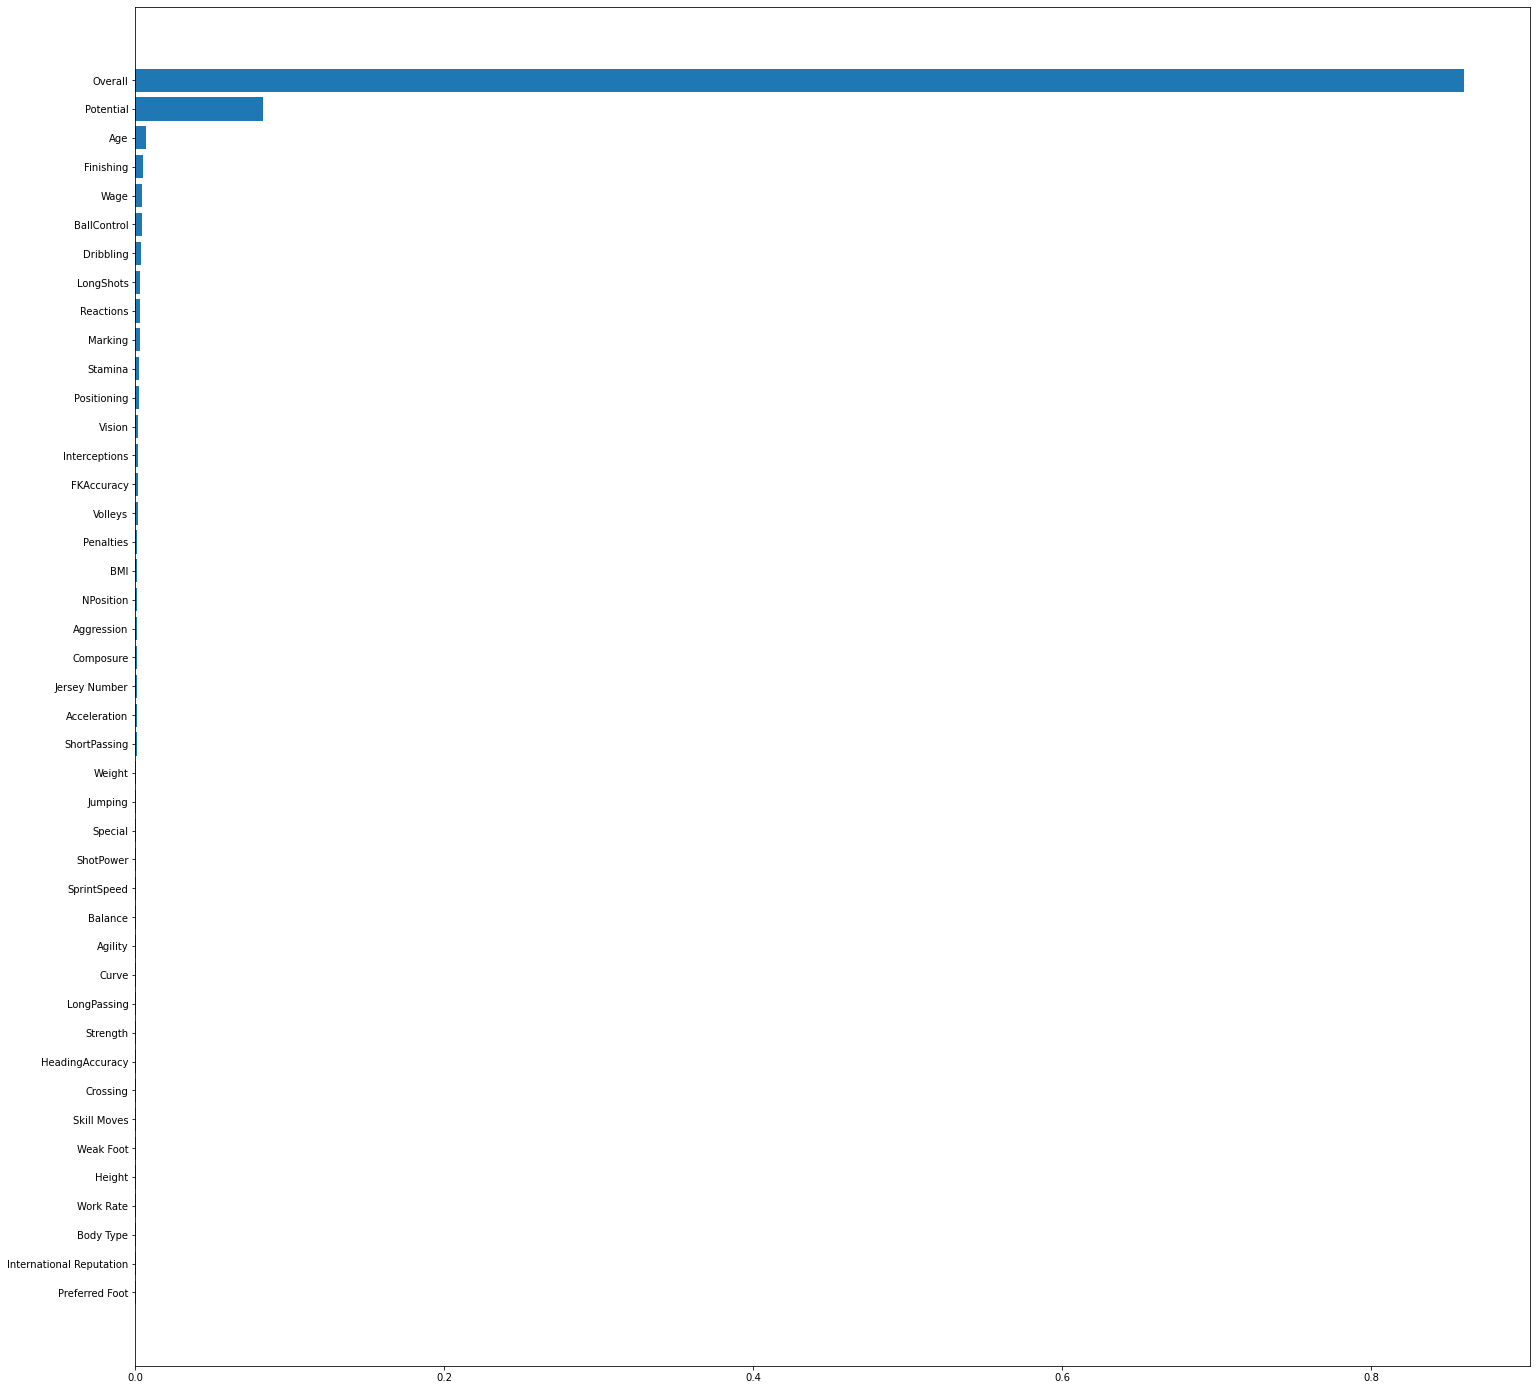

In [94]:
model = RandomForestRegressor(n_estimators = 100)
model.fit(X_value, y_value)
importances = model.feature_importances_
indices = np.argsort(importances)

fig = plt.figure(figsize = (25,25))
ax = fig.gca()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(features_name_value[indices])

fig.savefig(output_dir + "feature_importance_RFR_Value.png")

### Wage

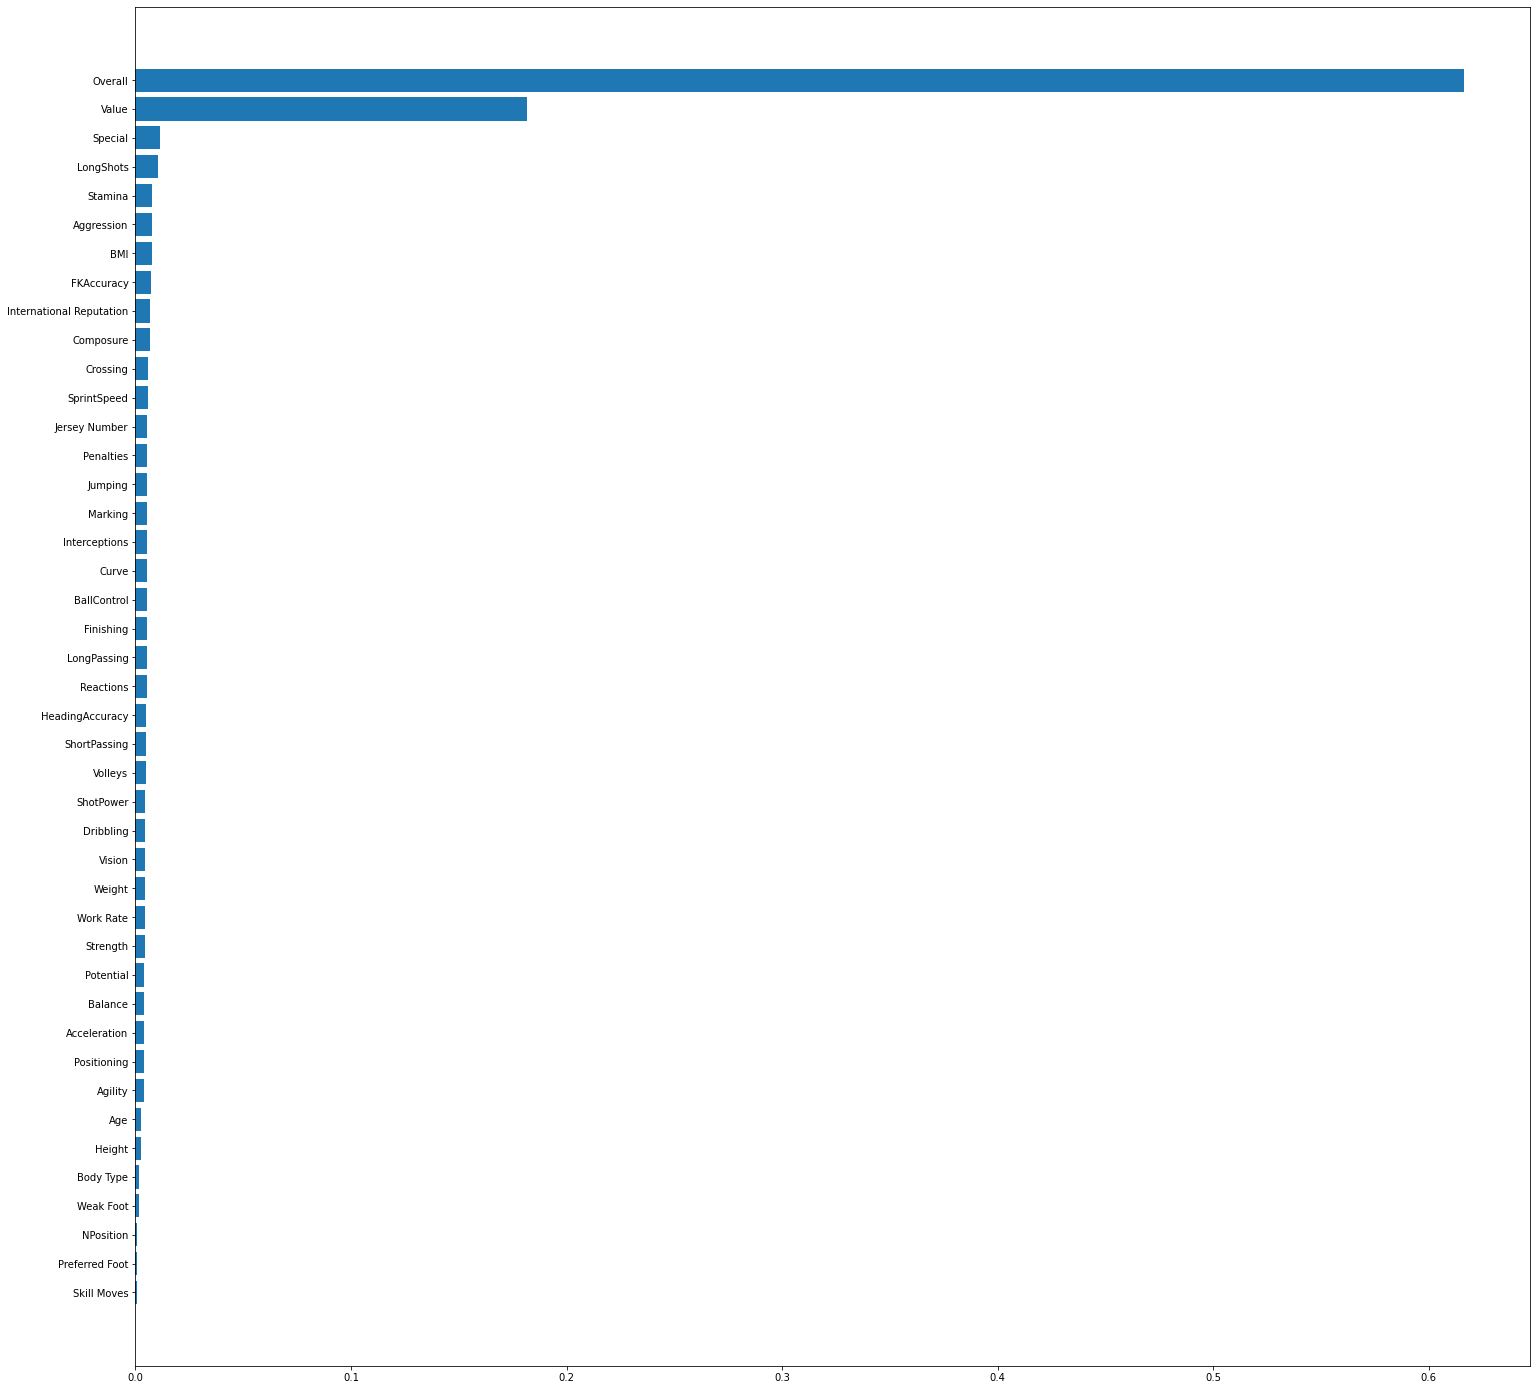

In [95]:
model = RandomForestRegressor(n_estimators = 100)
model.fit(X_wage, y_wage)
importances = model.feature_importances_
indices = np.argsort(importances)

fig = plt.figure(figsize = (25,25))
ax = fig.gca()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(features_name_wage[indices])

fig.savefig(output_dir + "feature_importance_RFR_WAge.png")

## Ce qui rend un joueur cher

In [61]:
data_pred['Nationality'] = data['Nationality']
fr_players = data_pred[ data_pred['Nationality'] == 'France' ].drop(['Nationality'], axis=1)
en_players = data_pred[ data_pred['Nationality'] == 'England'].drop(['Nationality'], axis=1)
br_players = data_pred[ data_pred['Nationality'] == 'Brazil' ].drop(['Nationality'], axis=1)
gr_players = data_pred[ data_pred['Nationality'] == 'Germany'].drop(['Nationality'], axis=1)
data_pred = data_pred.drop(['Nationality'], axis=1)

print("nb fr_players", fr_players.shape[0])
print("nb en_players", en_players.shape[0])
print("nb br_players", br_players.shape[0])
print("nb gr_players", gr_players.shape[0])

nb fr_players 757
nb en_players 1320
nb br_players 721
nb gr_players 993


In [91]:
X_fr = fr_players.drop(['DWage', 'DValue_3', 'DValue_4', 'DValue_6', 'Value'], axis=1)
X_en = en_players.drop(['DWage', 'DValue_3', 'DValue_4', 'DValue_6', 'Value'], axis=1)
X_br = br_players.drop(['DWage', 'DValue_3', 'DValue_4', 'DValue_6', 'Value'], axis=1)
X_gr = gr_players.drop(['DWage', 'DValue_3', 'DValue_4', 'DValue_6', 'Value'], axis=1)

# Features
features_fr_players = X_fr.columns
features_en_players = X_en.columns
features_br_players = X_br.columns
features_gr_players = X_gr.columns

# Target
y_fr = fr_players['Value'].astype(int)
y_fr_clf = fr_players['DValue_3']

y_en = en_players['Value'].astype(int)
y_br = br_players['Value'].astype(int)
y_gr = gr_players['Value'].astype(int)

# Scale
scaler = StandardScaler()
X_fr = scaler.fit_transform(X_fr)
X_en = scaler.fit_transform(X_en)
X_br = scaler.fit_transform(X_br)
X_gr = scaler.fit_transform(X_gr)

# Split
X_train_fr, X_test_fr, y_train_fr, y_test_fr = train_test_split(X_fr,y_fr,test_size=.3, random_state=random_state)
X_train_fr_clf, X_test_fr_clf, y_train_fr_clf, y_test_fr_clf = train_test_split(X_fr,y_fr_clf,test_size=.3, random_state=random_state)

X_train_en, X_test_en, y_train_en, y_test_en = train_test_split(X_en,y_en,test_size=.3, random_state=random_state)
X_train_br, X_test_br, y_train_br, y_test_br = train_test_split(X_br,y_br,test_size=.3, random_state=random_state)
X_train_gr, X_test_gr, y_train_gr, y_test_gr = train_test_split(X_gr,y_gr,test_size=.3, random_state=random_state)


### Test
Train on fr, predict on other

Scores: 
MAE score: 1971214.691533236
MSE score: 12056028605758.873
R2 score : 0.7548144014577636
--------------------------------------
0.7548144014577636


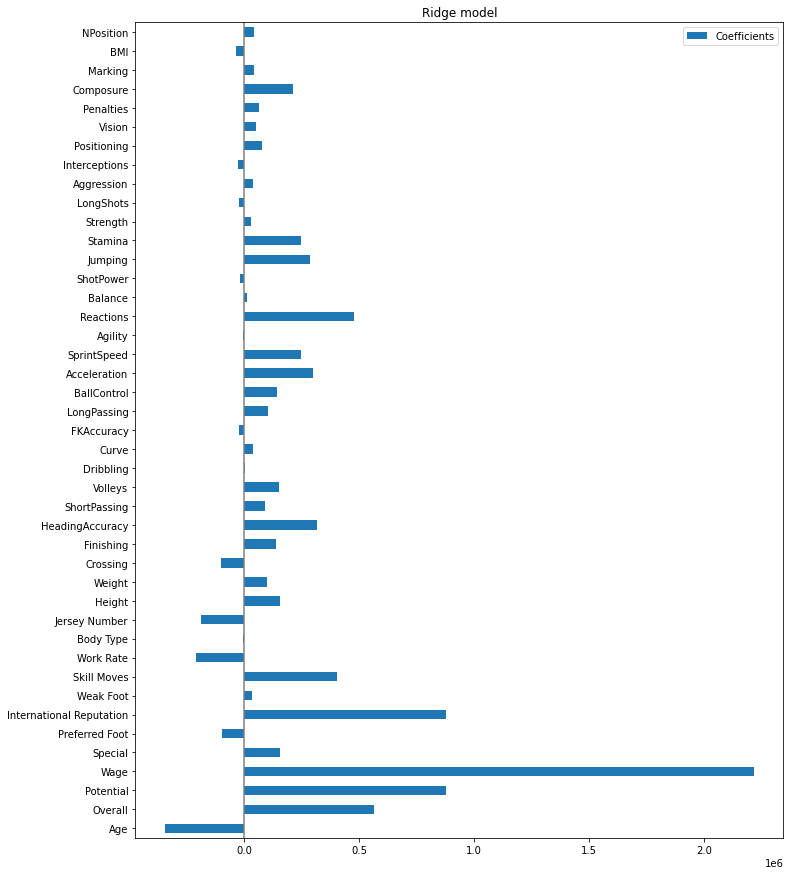

In [63]:
clf = Ridge(random_state=random_state, max_iter=1000, normalize=True).fit(X_train_fr, y_train_fr)
pred = clf.predict(X_train_br)
print_scores(y_train_br, pred)
print(clf.score(X_train_br, y_train_br))

coefs = pd.DataFrame(
   clf.coef_,
   columns=['Coefficients'], index=features_fr_players
)

ax = coefs.plot(kind='barh', figsize=(15, 15))
fig = ax.get_figure()
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)
fig.savefig(output_dir + "feature_im.png")

Scores: 
MAE score: 2580358.899245832
MSE score: 24513213973727.72
R2 score : 0.6346563161267671
--------------------------------------
0.6346563161267671


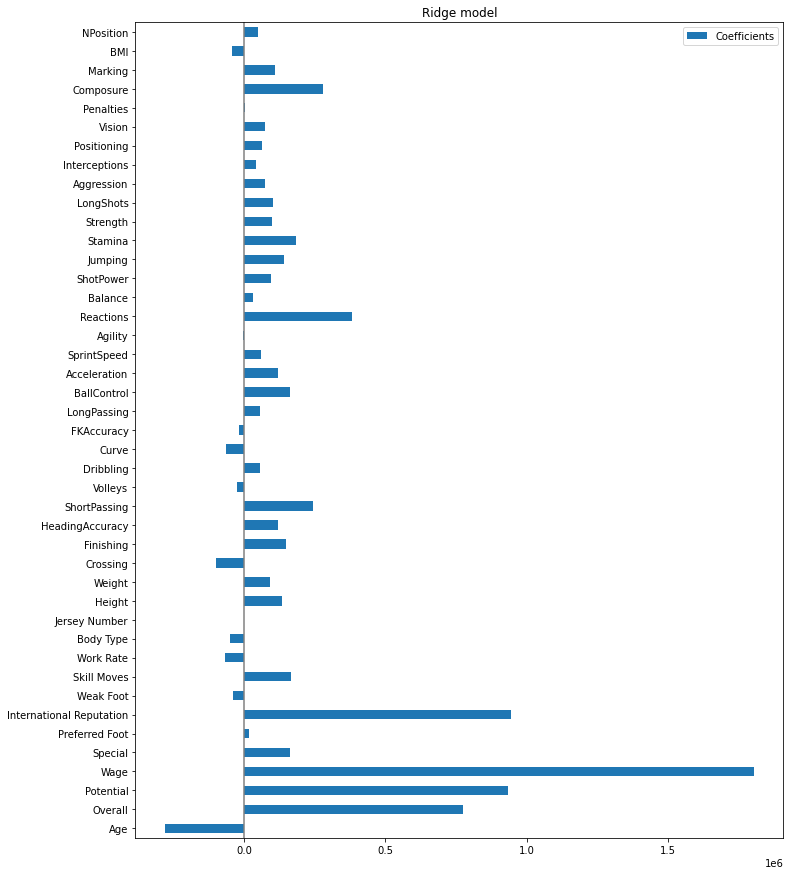

In [64]:
clf = Ridge(random_state=random_state, max_iter=1000, normalize=True).fit(X_train_br, y_train_br)
pred = clf.predict(X_train_fr)
print_scores(y_train_fr, pred)
print(clf.score(X_train_fr, y_train_fr))

coefs = pd.DataFrame(
   clf.coef_,
   columns=['Coefficients'], index=features_fr_players
)

ax = coefs.plot(kind='barh', figsize=(15, 15))
fig = ax.get_figure()
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)
fig.savefig(output_dir + "feature_importance_br_players_VS_fr_players_RIDGE.png")

### Feature Importance between players

### FR Players

model score on training data: 0.994168671324846
model score on testing data: 0.9946919829843198


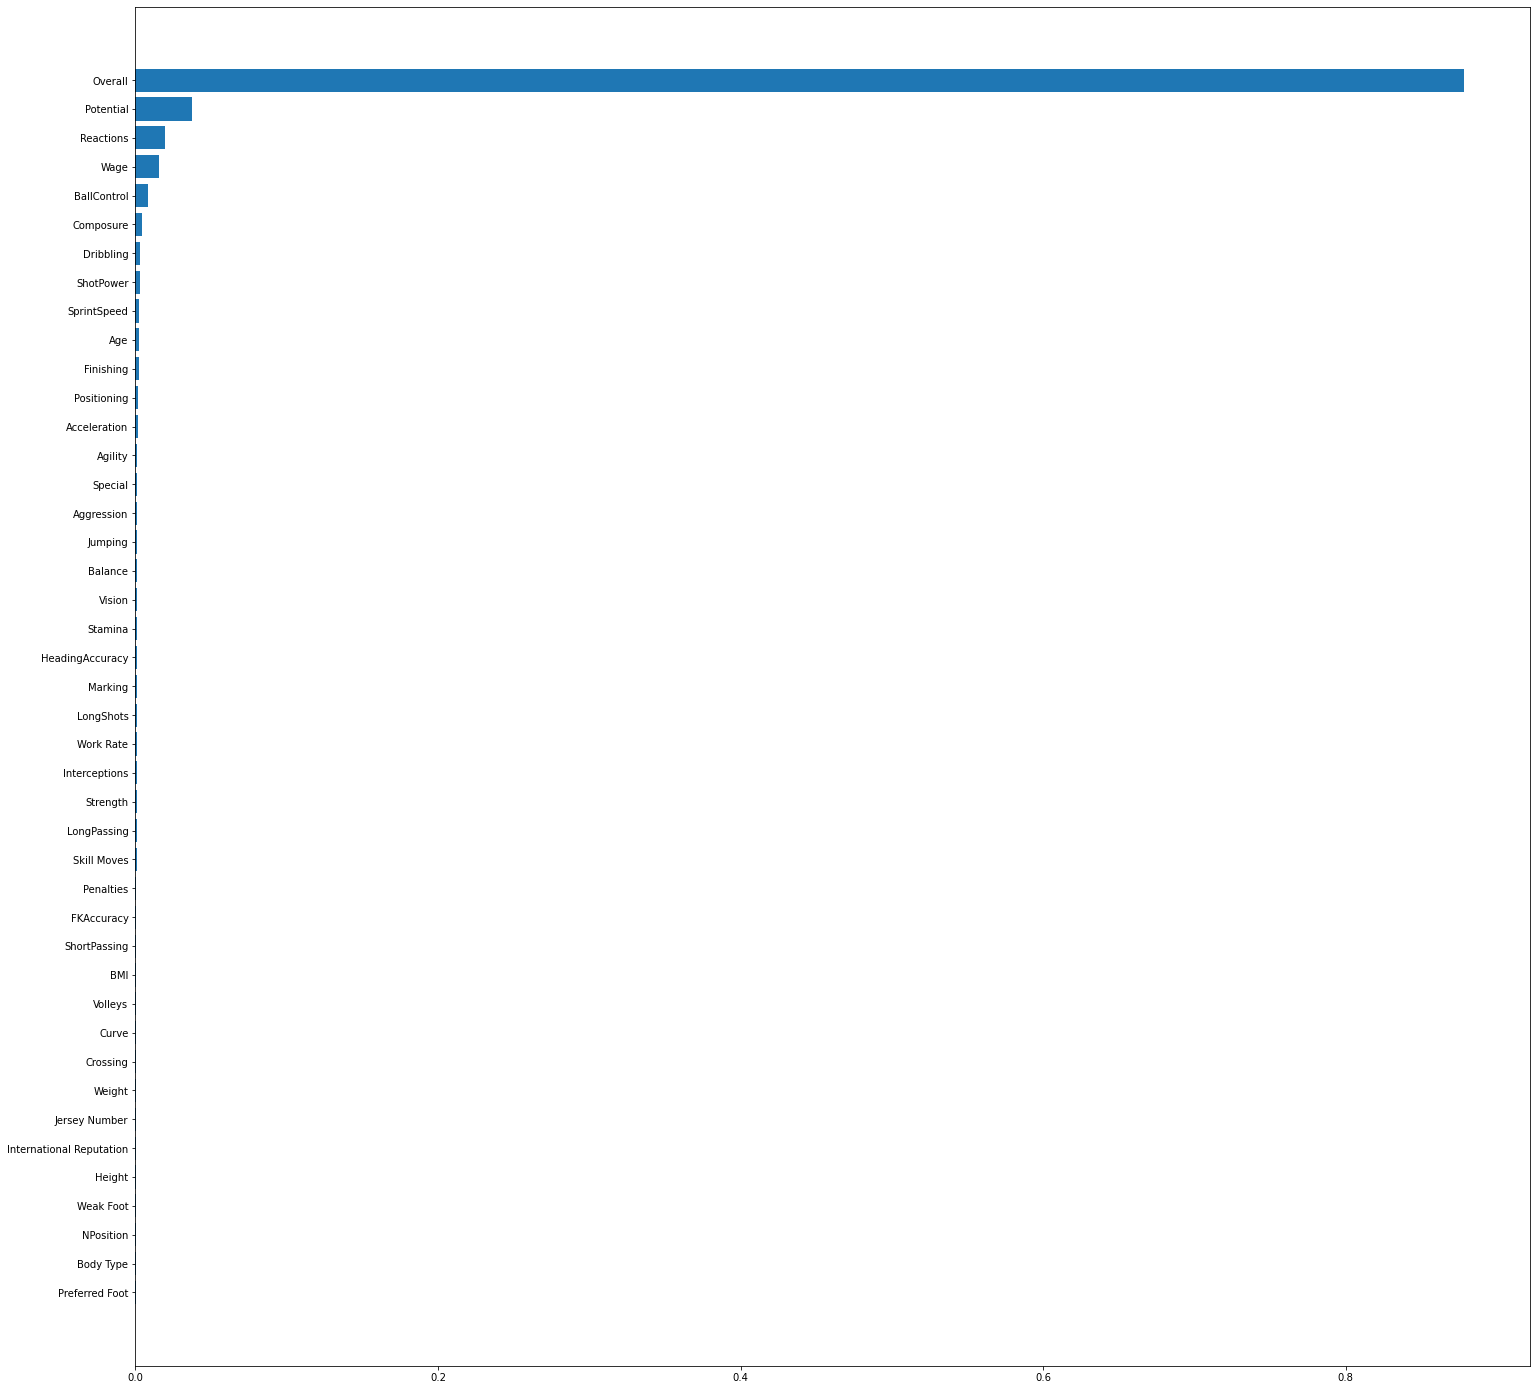

In [96]:
model = RandomForestRegressor()

model.fit(X_fr, y_fr)

print(f'model score on training data: {model.score(X_train_fr, y_train_fr)}')
print(f'model score on testing data: {model.score(X_test_fr, y_test_fr)}')

importances = model.feature_importances_

indices = np.argsort(importances)

fig = plt.figure(figsize = (25,25))
ax = fig.gca()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(features_fr_players[indices])
fig.savefig(output_dir + "feature_importance_RFR_Value_fr_players.png")

model score on training data: 1.0
model score on testing data: 1.0


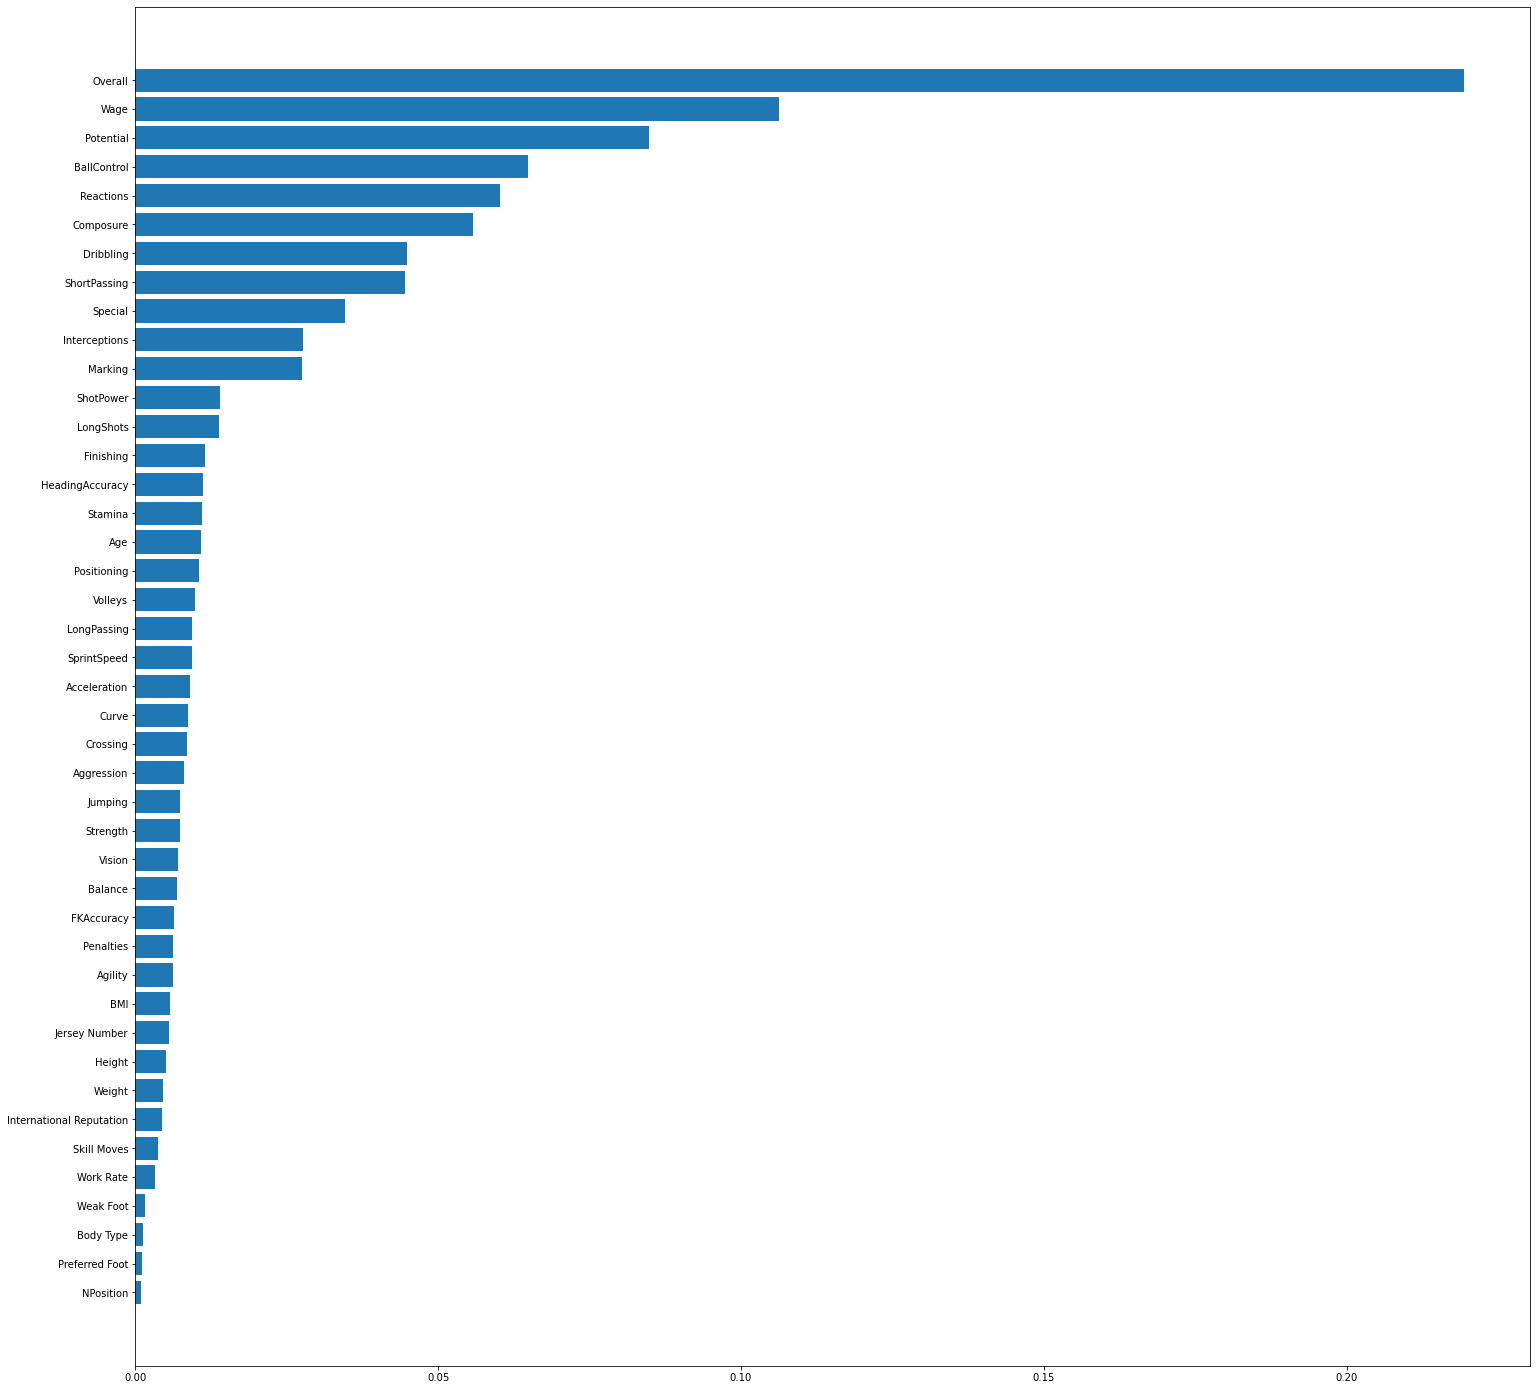

In [93]:
model = RandomForestClassifier()

model.fit(X_fr, y_fr_clf)

print(f'model score on training data: {model.score(X_train_fr_clf, y_train_fr_clf)}')
print(f'model score on testing data: {model.score(X_test_fr_clf, y_test_fr_clf)}')

importances = model.feature_importances_

indices = np.argsort(importances)

fig = plt.figure(figsize = (25,25))
ax = fig.gca()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(features_fr_players[indices])
fig.savefig(output_dir + "feature_importance_RFC_DValue_fr_players.png")

### BR Players

model score on training data: 0.9820192771095149
model score on testing data: 0.974901070826865


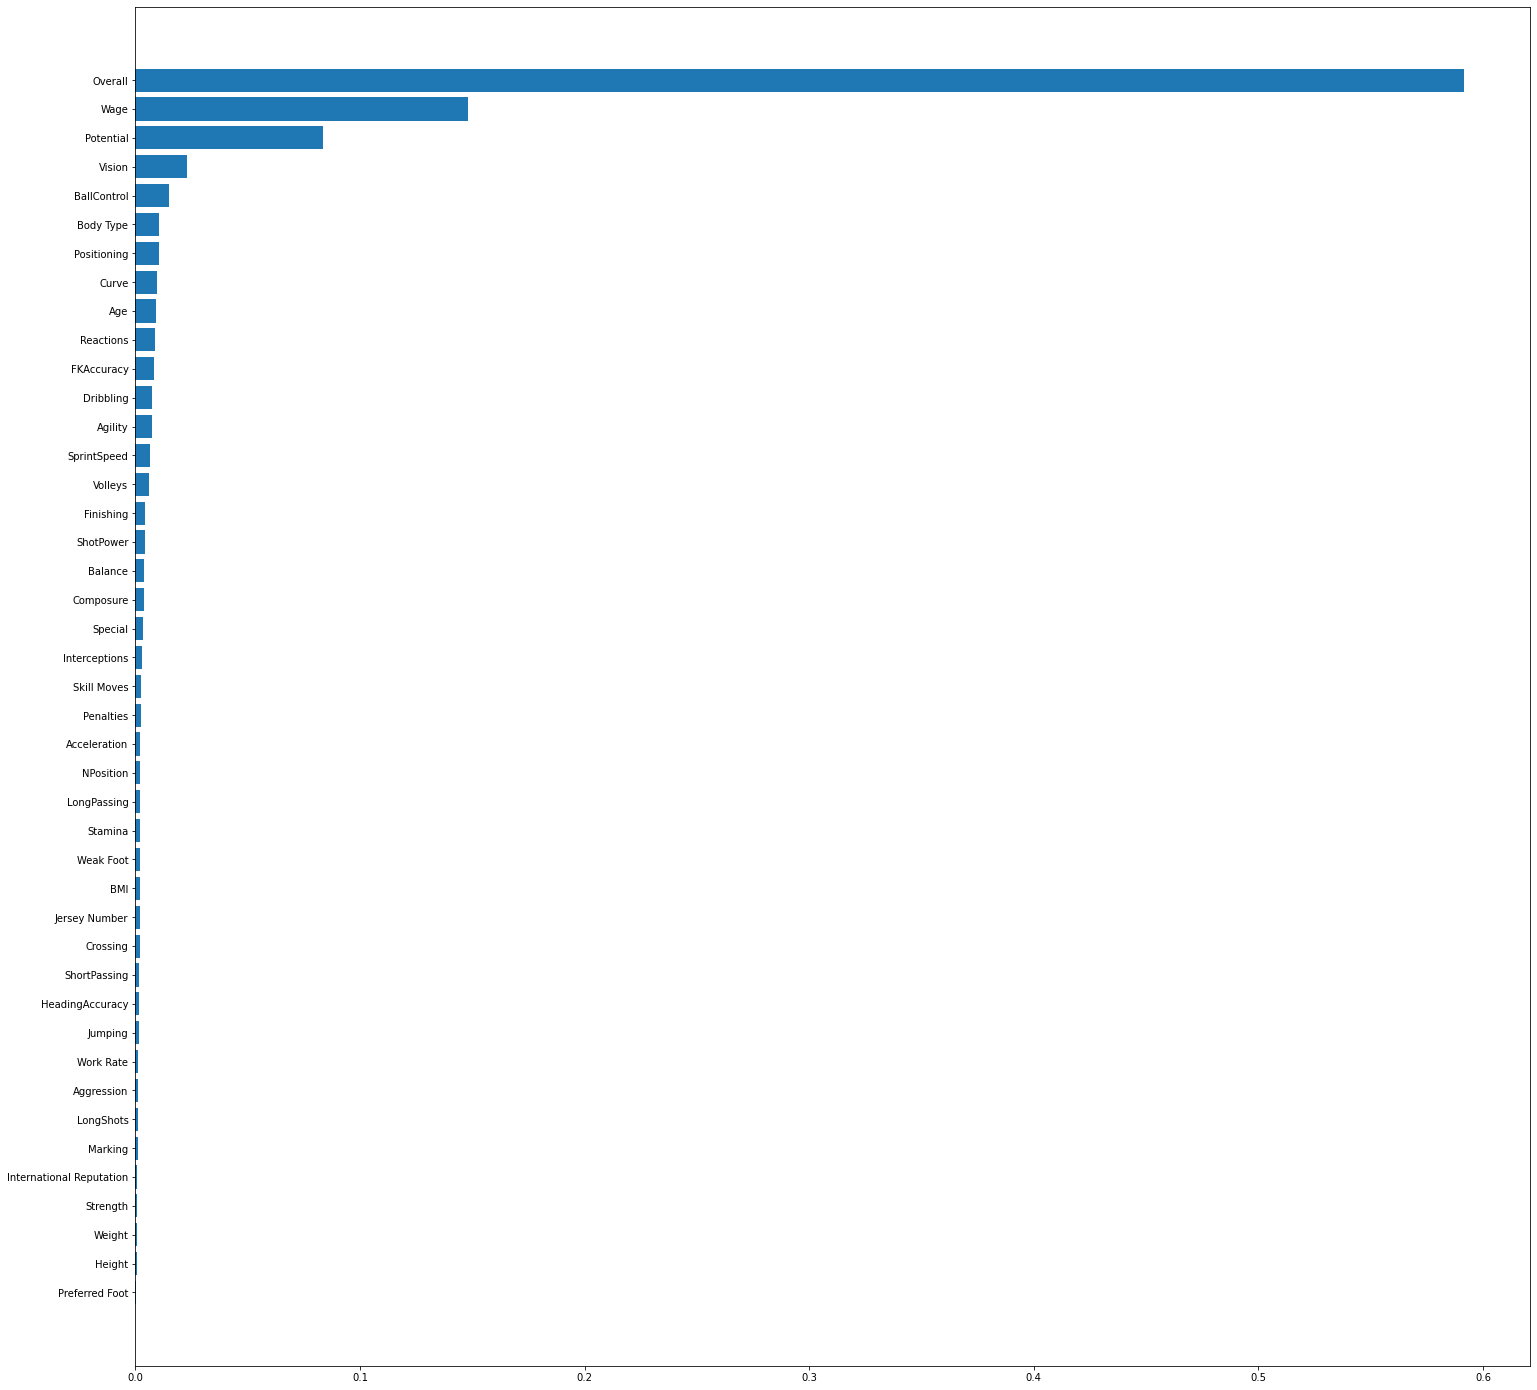

In [97]:
model = RandomForestRegressor()

model.fit(X_br, y_br)

print(f'model score on training data: {model.score(X_train_br, y_train_br)}')
print(f'model score on testing data: {model.score(X_test_br, y_test_br)}')

importances = model.feature_importances_

indices = np.argsort(importances)

fig = plt.figure(figsize = (25,25))
ax = fig.gca()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(features_br_players[indices])
fig.savefig(output_dir + "feature_importance_RFR_Value_br_players.png")

### GR Players

model score on training data: 0.9967737698544028
model score on testing data: 0.9882322373020787


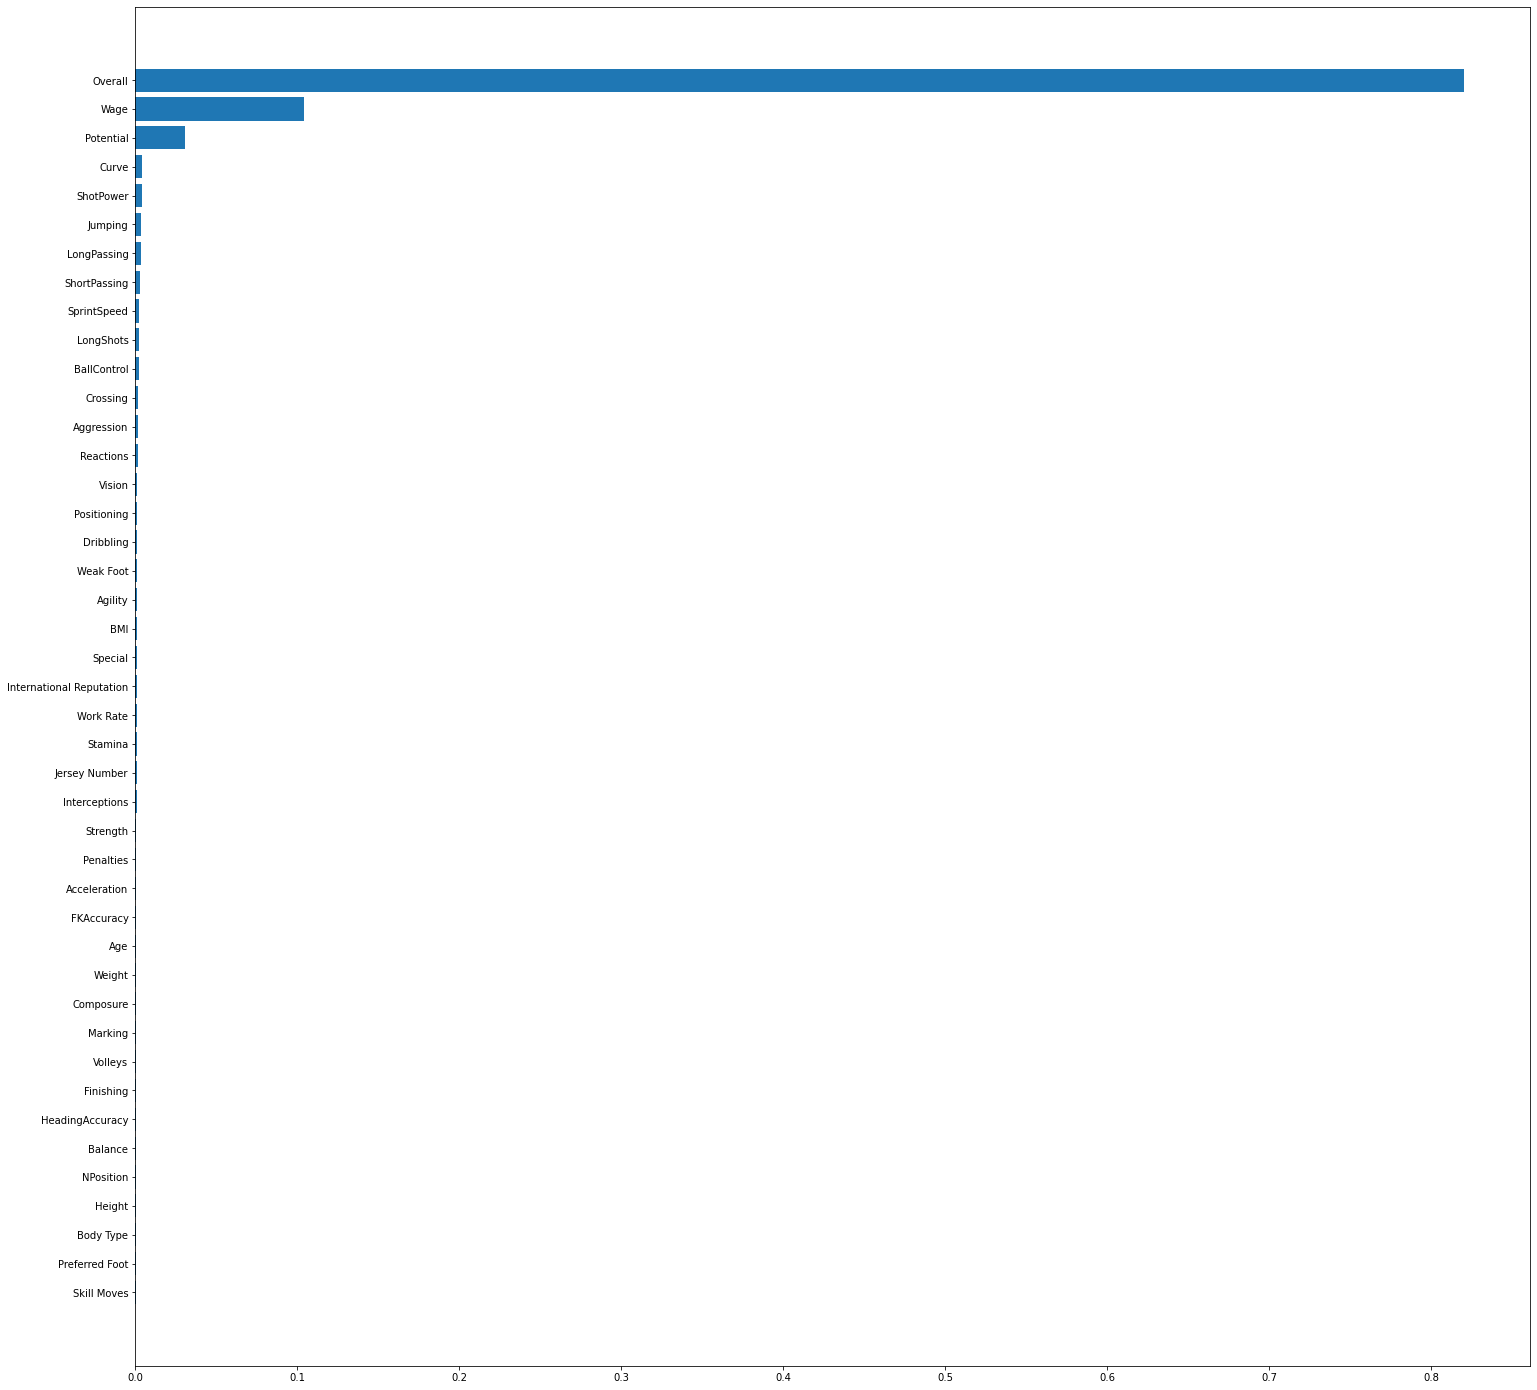

In [98]:
model = RandomForestRegressor()

model.fit(X_gr, y_gr)

print(f'model score on training data: {model.score(X_train_gr, y_train_gr)}')
print(f'model score on testing data: {model.score(X_test_gr, y_test_gr)}')

importances = model.feature_importances_

indices = np.argsort(importances)

fig = plt.figure(figsize = (25,25))
ax = fig.gca()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(features_gr_players[indices])
fig.savefig(output_dir + "feature_importance_RFR_Value_gr_players.png")